In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import KFold

pd.options.display.max_columns = None
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set_theme()
%matplotlib inline

# !!! This notebook contains some preliminary modeling and EDA work not included in the presentation. It helped inform but is not relevant to the final set of models. !!!

# Data Preparation
#### Import
 - import cleaned dataset
 - extract target
 - drop cols not relevant to model


In [8]:
homes_raw = pd.read_csv('../data/engineered.csv', index_col=0)
prices = homes_raw.SalePrice

dropcols = ['PID','SalePrice','MSSubClass','MoSold','YrSold','DateSold','IsNearNegativeCondition','IsNearPositiveCondition','Combine_BathroomsAbvGrd','Combine_BathroomsBsmt','AllBathrooms','LogSalePrice','latitude','longitude','district']
homes = homes_raw.drop(dropcols,axis=1)
homes.head()

GrLivArea MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0        856       RL         66.0     7890       2      0         4   
1       1049       RL         42.0     4235       2      0         4   
2       1001  C (all)         60.0     6060       2      0         4   
3       1039       RL         80.0     8146       2      0         4   
4       1665       RL         70.0     8400       2      0         4   

  LandContour  Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl          4    Corner          3        SWISU       Norm   
1         Lvl          4    Inside          3      Edwards       Norm   
2         Lvl          4    Inside          3       IDOTRR       Norm   
3         Lvl          4    Corner          3      OldTown       Norm   
4         Lvl          4    Inside          3       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            6            6       1939   
1       Norm   TwnhsE     1Story            5            5       1984   
2       Norm     1Fam     1Story            5            9       1930   
3       Norm     1Fam     2Story            4            8       1900   
4       Norm     1Fam     2Story            8            6       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1          1984     Gable  CompShg     HdBoard     HdBoard    BrkFace   
2          2007       Hip  CompShg     MetalSd     MetalSd       None   
3          2003     Gable  CompShg     MetalSd     MetalSd       None   
4          2001     Gable  CompShg     VinylSd     VinylSd       None   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0         0.0          3          3     CBlock         3         3   
1       149.0          4          3     CBlock         4         3   
2         0.0          4          3     BrkTil         3         3   
3         0.0          4          4     BrkTil         2         3   
4         0.0          4          3      PConc         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             1             3       238.0             1         0.0   
1             2             6       552.0             5       393.0   
2             1             5       737.0             1         0.0   
3             1             1         0.0             1         0.0   
4             1             6       643.0             1         0.0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC CentralAir Electrical  1stFlrSF  \
0      618.0        856.0    GasA          3          Y      SBrkr       856   
1      104.0       1049.0    GasA          3          Y      SBrkr      1049   
2      100.0        837.0    GasA          5          Y      SBrkr      1001   
3      405.0        405.0    GasA          4          Y      SBrkr       717   
4      167.0        810.0    GasA          5          Y      SBrkr       810   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         0             0           1.0           0.0         1         0   
1         0             0           1.0           0.0         2         0   
2         0             0           0.0           0.0         1         0   
3       322             0           0.0           0.0         1         0   
4       855             0           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             2             1            3             4           8   
1             2             1            4             5           8   
2             2             1            4             5           8   
3             2             1            3             6           8   
4             3             1            4             6           8   

   Fireplaces  FireplaceQu G

#### Label encode categorical features

In [9]:
catfeats = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
            'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','GarageFinish','Fence','MiscFeature','SaleType','CentralAir',
            'SaleCondition','IsPUD','Collapse_MSSubClass','IsRenovated']

labelencoder = LabelEncoder()

for i in catfeats:
    homes[i+"_Encoded"] = labelencoder.fit_transform(homes[i])

homes.drop(catfeats,axis=1,inplace=True)
homes.head()

GrLivArea  LotFrontage  LotArea  Street  Alley  LotShape  Utilities  \
0        856         66.0     7890       2      0         4          4   
1       1049         42.0     4235       2      0         4          4   
2       1001         60.0     6060       2      0         4          4   
3       1039         80.0     8146       2      0         4          4   
4       1665         70.0     8400       2      0         4          4   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          3            6            6       1939          1950         0.0   
1          3            5            5       1984          1984       149.0   
2          3            5            9       1930          2007         0.0   
3          3            4            8       1900          2003         0.0   
4          3            8            6       2001          2001         0.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             3   
1          4          3         4         3             2             6   
2          4          3         3         3             1             5   
3          4          4         2         3             1             1   
4          4          3         4         3             1             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0       238.0             1         0.0      618.0        856.0          3   
1       552.0             5       393.0      104.0       1049.0          3   
2       737.0             1         0.0      100.0        837.0          5   
3         0.0             1         0.0      405.0        405.0          4   
4       643.0             1         0.0      167.0        810.0          5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0       856         0             0           1.0           0.0         1   
1      1049         0             0           1.0           0.0         2   
2      1001         0             0           0.0           0.0         1   
3       717       322             0           0.0           0.0         1   
4       810       855             0           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0             2             1            3             4   
1         0             2             1            4             5   
2         0             2             1            4             5   
3         0             2             1            3             6   
4         1             3             1            4             6   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  \
0           8           1            4       1939.0         2.0       399.0   
1           8           0            0       1984.0         1.0       266.0   
2           8           0            0       1930.0         1.0       216.0   
3           8           0            0       1940.0         1.0       281.0   
4           8           0            0       2001.0         2.0       528.0   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           3           3           3           0            0              0   
1           3           3           3           0          105              0   
2           3           1           1         154            0             42   
3           3           3           1           0            0            168   
4           3           3           3           0           45              0   

   3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  NumFloors  Combine_Age  \
0          0          166         0       0        0        1.0           60   
1          0            0         0       0        0        1.0           25   
2         86            0         0       0        0        1.0            0 

In [12]:
def get_score(model):

    model.fit(X_train,Y_train)
    print('Train Accuracy: ', model.score(X_train,Y_train))
    print('Test Accuracy: ', model.score(X_test,Y_test))

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(homes, prices, random_state=0, test_size=0.3)

# Modeling - All Features
- accuracy of base model with default hyperparameters ~0.985/0.905
- tuning hyperparameters had slight improvement, best case ~0.987/0.910
- this suggests overfitting due - time to reduce dimensionality!


#### Naive Model

In [11]:
forest = RandomForestRegressor()
forest.set_params(random_state=0)

get_score(forest)

NameError: name 'get_score' is not defined

#### Hyperparameter Tuning

First Attempt - focus on depth and criterion
- similar accuracy results to defaults - still overfitting
- limiting max depth appears good
- squared error seems like the better evaluator
- having a very large forest doesn't provide much improvement

In [11]:
grid_para_forest = [{
    'n_estimators' : range(100,500,50),
    'criterion' : ['squared_error','poisson'],  #sklearn doc says absolute_error is slow compared to others
    'max_depth' : range(10,50,10),
    'min_samples_split' : range(2,20,2)
    # 'max_features' : 
    # 'random_state':
}]

grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)

get_score(grid_search_forest)

Train Accuracy:  0.9862523247269853
Test Accuracy:  0.9056004659340895


In [12]:
grid_search_forest.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 150}

In [33]:
best_forest = grid_search_forest.best_estimator_

forest_params1 = pd.DataFrame(best_forest.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
forest_params1.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
forest_params1

Feature         Score
8                   OverallQual  5.406479e-01
0                     GrLivArea  1.388422e-01
25                     1stFlrSF  5.457879e-02
23                  TotalBsmtSF  4.061743e-02
41                   GarageArea  3.536719e-02
19                   BsmtFinSF1  2.485385e-02
2                       LotArea  1.424035e-02
13                    ExterQual  1.219379e-02
12                   MasVnrArea  1.178312e-02
10                    YearBuilt  9.661028e-03
40                   GarageCars  8.142526e-03
30                     FullBath  7.281327e-03
54                  Combine_Age  6.613924e-03
11                 YearRemodAdd  5.648051e-03
9                   OverallCond  4.498874e-03
46                  OpenPorchSF  4.450033e-03
45                   WoodDeckSF  4.252789e-03
1                   LotFrontage  4.223003e-03
22                    BsmtUnfSF  4.129157e-03
18                 BsmtFinType1  4.122714e-03
58         Neighborhood_Encoded  3.910376e-03
15                     BsmtQual  3.794929e-03
39                  GarageYrBlt  3.723584e-03
26                     2ndFlrSF  3.697133e-03
55             MSZoning_Encoded  3.294957e-03
17                 BsmtExposure  3.278860e-03
35                 TotRmsAbvGrd  3.276007e-03
49                  ScreenPorch  3.173006e-03
71           GarageType_Encoded  2.994615e-03
34                  KitchenQual  2.887176e-03
28                 BsmtFullBath  2.494184e-03
38                  FireplaceQu  1.968990e-03
37                   Fireplaces  1.778868e-03
24                    HeatingQC  1.757184e-03
65          Exterior1st_Encoded  1.449255e-03
32                 BedroomAbvGr  1.436562e-03
5                      LotShape  1.232667e-03
77        SaleCondition_Encoded  1.138113e-03
66          Exterior2nd_Encoded  1.069577e-03
76           CentralAir_Encoded  9.999939e-04
72         GarageFinish_Encoded  8.482248e-04
47                EnclosedPorch  7.801951e-04
31                     HalfBath  7.497811e-04
63            RoofStyle_Encoded  7.449956e-04
44                   PavedDrive  7.410432e-04
16                     BsmtCond  7.399967e-04
68           Foundation_Encoded  7.189670e-04
62           HouseStyle_Encoded  7.015535e-04
59           Condition1_Encoded  5.769168e-04
57            LotConfig_Encoded  5.652396e-04
75             SaleType_Encoded  5.625925e-04
56          LandContour_Encoded  5.192208e-04
14                    ExterCond  4.877955e-04
67           MasVnrType_Encoded  4.864827e-04
53                    NumFloors  4.622143e-04
61             BldgType_Encoded  4.386791e-04
20                 BsmtFinType2  4.287479e-04
21                   BsmtFinSF2  4.236848e-04
80          IsRenovated_Encoded  3.901031e-04
36                   Functional  3.897168e-04
4                         Alley  3.463243e-04
43                   GarageCond  3.396886e-04
73                Fence_Encoded  3.125334e-04
7                     LandSlope  2.730418e-04
42                   GarageQual  2.080048e-04
79  Collapse_MSSubClass_Encoded  2.017141e-04
64             RoofMatl_Encoded  1.484951e-04
70           Electrical_Encoded  1.346613e-04
48                    3SsnPorch  1.300237e-04
29                 BsmtHalfBath  1.284852e-04
60           Condition2_Encoded  1.025481e-04
33                 KitchenAbvGr  8.067422e-05
27                 LowQualFinSF  7.392484e-05
69              Heating_Encoded  7.058097e-05
78                IsPUD_Encoded  5.747802e-05
52                      MiscVal  5.510943e-05
74          MiscFeature_Encoded  4.198623e-05
50                     PoolArea  1.401785e-05
51                       PoolQC  1.335171e-05
3                        Street  6.781064e-06
6                     Utilities  4.165989e-07

Second Attempt - Focus on features and splitting
- 150 max trees and 20 max depth still are best (should I try smaller depth?)
- limiting features appears to have a good result
- min_samples_split seems to have a positive effect

In [26]:
grid_para_forest2 = [{
    'n_estimators' : range(100,300,50),
    'criterion' : ['squared_error'],  #sklearn doc says absolute_error is slow compared to others
    'max_depth' : [20,25,30],
    'min_samples_split' : [2,5,20],
    'min_samples_leaf' : [2,5,10],
    'max_features' : range(5,80,10)
}]

grid_search_forest2 = GridSearchCV(forest, grid_para_forest2, scoring='r2', cv=5, n_jobs=-1)

get_score(grid_search_forest2)

Train Accuracy:  0.9760240772488377
Test Accuracy:  0.9120073306131777


In [27]:
grid_search_forest2.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [34]:
best_forest = grid_search_forest2.best_estimator_

forest_params2 = pd.DataFrame(best_forest.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
forest_params2.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
forest_params2

Feature         Score
8                   OverallQual  1.997258e-01
13                    ExterQual  1.267874e-01
0                     GrLivArea  1.137751e-01
40                   GarageCars  8.737853e-02
41                   GarageArea  5.613286e-02
10                    YearBuilt  5.502789e-02
23                  TotalBsmtSF  5.361323e-02
25                     1stFlrSF  5.025388e-02
34                  KitchenQual  2.656012e-02
19                   BsmtFinSF1  2.282199e-02
2                       LotArea  1.812988e-02
26                     2ndFlrSF  1.607331e-02
15                     BsmtQual  1.537565e-02
30                     FullBath  1.411054e-02
38                  FireplaceQu  1.184472e-02
39                  GarageYrBlt  1.149478e-02
12                   MasVnrArea  1.066390e-02
11                 YearRemodAdd  9.125926e-03
37                   Fireplaces  8.562813e-03
54                  Combine_Age  6.969185e-03
71           GarageType_Encoded  6.802121e-03
1                   LotFrontage  6.233695e-03
35                 TotRmsAbvGrd  6.079778e-03
22                    BsmtUnfSF  4.844342e-03
9                   OverallCond  4.606029e-03
58         Neighborhood_Encoded  4.548092e-03
18                 BsmtFinType1  4.525008e-03
45                   WoodDeckSF  4.457975e-03
46                  OpenPorchSF  4.118723e-03
17                 BsmtExposure  3.170805e-03
32                 BedroomAbvGr  2.448068e-03
28                 BsmtFullBath  2.188064e-03
49                  ScreenPorch  2.161469e-03
76           CentralAir_Encoded  1.968194e-03
31                     HalfBath  1.950310e-03
55             MSZoning_Encoded  1.937741e-03
65          Exterior1st_Encoded  1.498943e-03
66          Exterior2nd_Encoded  1.397432e-03
24                    HeatingQC  1.193337e-03
5                      LotShape  1.185179e-03
72         GarageFinish_Encoded  1.146551e-03
75             SaleType_Encoded  1.059674e-03
62           HouseStyle_Encoded  9.918901e-04
44                   PavedDrive  9.005335e-04
53                    NumFloors  8.912990e-04
21                   BsmtFinSF2  8.742581e-04
68           Foundation_Encoded  8.253072e-04
57            LotConfig_Encoded  8.101906e-04
63            RoofStyle_Encoded  7.467511e-04
43                   GarageCond  7.419961e-04
61             BldgType_Encoded  7.404446e-04
77        SaleCondition_Encoded  7.037976e-04
47                EnclosedPorch  6.628020e-04
56          LandContour_Encoded  6.492075e-04
16                     BsmtCond  5.868576e-04
20                 BsmtFinType2  5.347153e-04
80          IsRenovated_Encoded  5.224589e-04
7                     LandSlope  5.163218e-04
42                   GarageQual  5.123778e-04
59           Condition1_Encoded  4.886278e-04
67           MasVnrType_Encoded  4.865050e-04
14                    ExterCond  4.494089e-04
36                   Functional  3.999192e-04
73                Fence_Encoded  3.814610e-04
78                IsPUD_Encoded  3.300115e-04
64             RoofMatl_Encoded  2.292197e-04
79  Collapse_MSSubClass_Encoded  2.278099e-04
33                 KitchenAbvGr  2.083085e-04
70           Electrical_Encoded  1.800951e-04
4                         Alley  1.704302e-04
29                 BsmtHalfBath  7.725208e-05
48                    3SsnPorch  5.411930e-05
52                      MiscVal  4.652283e-05
60           Condition2_Encoded  3.779834e-05
27                 LowQualFinSF  2.953511e-05
74          MiscFeature_Encoded  2.146862e-05
69              Heating_Encoded  2.036368e-05
3                        Street  8.990608e-07
50                     PoolArea  0.000000e+00
6                     Utilities  0.000000e+00
51                       PoolQC  0.000000e+00

Third attempt
- revisit lower max_depth with max_features
- look for more clarity in min_samples_split

In [35]:
grid_para_forest3 = [{
    'n_estimators' : range(100,300,50),
    'criterion' : ['squared_error'],  #sklearn doc says absolute_error is slow compared to others
    'max_depth' : [10,15,20,25,30],
    'min_samples_split' : range(2,10,2),
    # 'min_samples_leaf' : [2,5,10],
    'max_features' : range(10,30,5)
}]

grid_search_forest3 = GridSearchCV(forest, grid_para_forest3, scoring='r2', cv=5, n_jobs=-1)

get_score(grid_search_forest3)

Train Accuracy:  0.9868194698859898
Test Accuracy:  0.9104944324716694


In [41]:
grid_search_forest3.best_params_

{'criterion': 'squared_error',
 'max_depth': 25,
 'max_features': 20,
 'min_samples_split': 2,
 'n_estimators': 200}

In [36]:
best_forest = grid_search_forest3.best_estimator_

forest_params3 = pd.DataFrame(best_forest.feature_importances_, index=homes.columns).reset_index().sort_values(by=0,ascending=False)
forest_params3.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
forest_params3

Feature         Score
8                   OverallQual  1.986168e-01
0                     GrLivArea  1.193489e-01
13                    ExterQual  1.058613e-01
40                   GarageCars  6.987671e-02
23                  TotalBsmtSF  5.689270e-02
10                    YearBuilt  5.517790e-02
41                   GarageArea  5.329777e-02
25                     1stFlrSF  5.305677e-02
34                  KitchenQual  2.918973e-02
19                   BsmtFinSF1  2.357946e-02
15                     BsmtQual  2.197686e-02
2                       LotArea  1.905011e-02
39                  GarageYrBlt  1.401910e-02
26                     2ndFlrSF  1.374136e-02
38                  FireplaceQu  1.212359e-02
54                  Combine_Age  1.113932e-02
30                     FullBath  1.099597e-02
12                   MasVnrArea  9.899292e-03
37                   Fireplaces  9.256847e-03
71           GarageType_Encoded  8.744227e-03
35                 TotRmsAbvGrd  8.104676e-03
11                 YearRemodAdd  7.968871e-03
1                   LotFrontage  7.095016e-03
22                    BsmtUnfSF  5.605463e-03
45                   WoodDeckSF  5.354125e-03
58         Neighborhood_Encoded  5.073350e-03
9                   OverallCond  4.712721e-03
46                  OpenPorchSF  4.662261e-03
18                 BsmtFinType1  4.256161e-03
17                 BsmtExposure  3.485291e-03
32                 BedroomAbvGr  3.364119e-03
28                 BsmtFullBath  2.728524e-03
31                     HalfBath  2.449121e-03
49                  ScreenPorch  2.317642e-03
55             MSZoning_Encoded  2.171681e-03
66          Exterior2nd_Encoded  1.997486e-03
65          Exterior1st_Encoded  1.881433e-03
24                    HeatingQC  1.803495e-03
62           HouseStyle_Encoded  1.576300e-03
53                    NumFloors  1.514466e-03
63            RoofStyle_Encoded  1.447893e-03
5                      LotShape  1.426000e-03
77        SaleCondition_Encoded  1.368821e-03
72         GarageFinish_Encoded  1.366372e-03
76           CentralAir_Encoded  1.340770e-03
47                EnclosedPorch  1.141502e-03
44                   PavedDrive  1.049549e-03
7                     LandSlope  1.027090e-03
43                   GarageCond  1.019834e-03
68           Foundation_Encoded  9.250379e-04
16                     BsmtCond  9.143780e-04
61             BldgType_Encoded  8.764903e-04
21                   BsmtFinSF2  8.629250e-04
59           Condition1_Encoded  8.515550e-04
14                    ExterCond  8.380099e-04
67           MasVnrType_Encoded  8.049490e-04
57            LotConfig_Encoded  7.695688e-04
75             SaleType_Encoded  7.585070e-04
56          LandContour_Encoded  7.225757e-04
42                   GarageQual  7.012355e-04
20                 BsmtFinType2  6.910175e-04
4                         Alley  5.731554e-04
80          IsRenovated_Encoded  5.674294e-04
36                   Functional  5.658408e-04
73                Fence_Encoded  5.027163e-04
79  Collapse_MSSubClass_Encoded  4.658024e-04
64             RoofMatl_Encoded  3.898717e-04
78                IsPUD_Encoded  3.075733e-04
70           Electrical_Encoded  2.326435e-04
29                 BsmtHalfBath  2.254888e-04
48                    3SsnPorch  1.984888e-04
51                       PoolQC  1.969757e-04
33                 KitchenAbvGr  1.892457e-04
27                 LowQualFinSF  1.854357e-04
52                      MiscVal  1.279384e-04
69              Heating_Encoded  1.249361e-04
60           Condition2_Encoded  1.101230e-04
74          MiscFeature_Encoded  1.052915e-04
50                     PoolArea  4.704355e-05
3                        Street  1.267402e-05
6                     Utilities  3.797236e-07

Merge Estimator Results

In [40]:
forest_params = pd.merge(forest_params1,forest_params2,on='Feature')
forest_params = pd.merge(forest_params,forest_params3,on='Feature')
forest_params

Feature       Score_x       Score_y         Score
0                   OverallQual  5.406479e-01  1.997258e-01  1.986168e-01
1                     GrLivArea  1.388422e-01  1.137751e-01  1.193489e-01
2                      1stFlrSF  5.457879e-02  5.025388e-02  5.305677e-02
3                   TotalBsmtSF  4.061743e-02  5.361323e-02  5.689270e-02
4                    GarageArea  3.536719e-02  5.613286e-02  5.329777e-02
5                    BsmtFinSF1  2.485385e-02  2.282199e-02  2.357946e-02
6                       LotArea  1.424035e-02  1.812988e-02  1.905011e-02
7                     ExterQual  1.219379e-02  1.267874e-01  1.058613e-01
8                    MasVnrArea  1.178312e-02  1.066390e-02  9.899292e-03
9                     YearBuilt  9.661028e-03  5.502789e-02  5.517790e-02
10                   GarageCars  8.142526e-03  8.737853e-02  6.987671e-02
11                     FullBath  7.281327e-03  1.411054e-02  1.099597e-02
12                  Combine_Age  6.613924e-03  6.969185e-03  1.113932e-02
13                 YearRemodAdd  5.648051e-03  9.125926e-03  7.968871e-03
14                  OverallCond  4.498874e-03  4.606029e-03  4.712721e-03
15                  OpenPorchSF  4.450033e-03  4.118723e-03  4.662261e-03
16                   WoodDeckSF  4.252789e-03  4.457975e-03  5.354125e-03
17                  LotFrontage  4.223003e-03  6.233695e-03  7.095016e-03
18                    BsmtUnfSF  4.129157e-03  4.844342e-03  5.605463e-03
19                 BsmtFinType1  4.122714e-03  4.525008e-03  4.256161e-03
20         Neighborhood_Encoded  3.910376e-03  4.548092e-03  5.073350e-03
21                     BsmtQual  3.794929e-03  1.537565e-02  2.197686e-02
22                  GarageYrBlt  3.723584e-03  1.149478e-02  1.401910e-02
23                     2ndFlrSF  3.697133e-03  1.607331e-02  1.374136e-02
24             MSZoning_Encoded  3.294957e-03  1.937741e-03  2.171681e-03
25                 BsmtExposure  3.278860e-03  3.170805e-03  3.485291e-03
26                 TotRmsAbvGrd  3.276007e-03  6.079778e-03  8.104676e-03
27                  ScreenPorch  3.173006e-03  2.161469e-03  2.317642e-03
28           GarageType_Encoded  2.994615e-03  6.802121e-03  8.744227e-03
29                  KitchenQual  2.887176e-03  2.656012e-02  2.918973e-02
30                 BsmtFullBath  2.494184e-03  2.188064e-03  2.728524e-03
31                  FireplaceQu  1.968990e-03  1.184472e-02  1.212359e-02
32                   Fireplaces  1.778868e-03  8.562813e-03  9.256847e-03
33                    HeatingQC  1.757184e-03  1.193337e-03  1.803495e-03
34          Exterior1st_Encoded  1.449255e-03  1.498943e-03  1.881433e-03
35                 BedroomAbvGr  1.436562e-03  2.448068e-03  3.364119e-03
36                     LotShape  1.232667e-03  1.185179e-03  1.426000e-03
37        SaleCondition_Encoded  1.138113e-03  7.037976e-04  1.368821e-03
38          Exterior2nd_Encoded  1.069577e-03  1.397432e-03  1.997486e-03
39           CentralAir_Encoded  9.999939e-04  1.968194e-03  1.340770e-03
40         GarageFinish_Encoded  8.482248e-04  1.146551e-03  1.366372e-03
41                EnclosedPorch  7.801951e-04  6.628020e-04  1.141502e-03
42                     HalfBath  7.497811e-04  1.950310e-03  2.449121e-03
43            RoofStyle_Encoded  7.449956e-04  7.467511e-04  1.447893e-03
44                   PavedDrive  7.410432e-04  9.005335e-04  1.049549e-03
45                     BsmtCond  7.399967e-04  5.868576e-04  9.143780e-04
46           Foundation_Encoded  7.189670e-04  8.253072e-04  9.250379e-04
47           HouseStyle_Encoded  7.015535e-04  9.918901e-04  1.576300e-03
48           Condition1_Encoded  5.769168e-04  4.886278e-04  8.515550e-04
49            LotConfig_Encoded  5.652396e-04  8.101906e-04  7.695688e-04
50             SaleType_Encoded  5.625925e-04  1.059674e-03  7.585070e-04
51          LandContour_Encoded  5.192208e-04  6.492075e-04  7.225757e-04
52                    ExterCond  4.877955e-04  4.494089e-04  8.380099e-04
53           MasVnrType_Enco

# Feature Engineering & Selection

#### Visualizing X vs Y values

Screening Visual EDA

In [8]:
names = homes.columns.tolist()

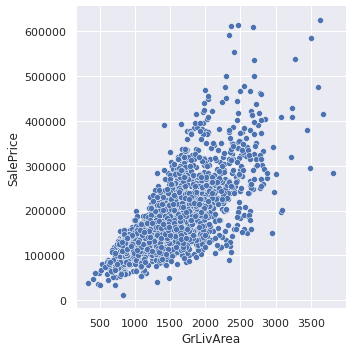

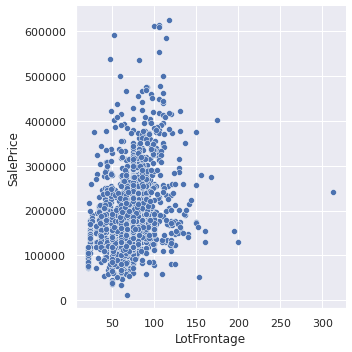

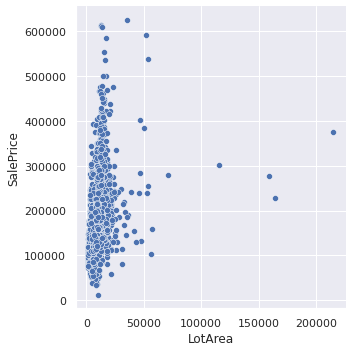

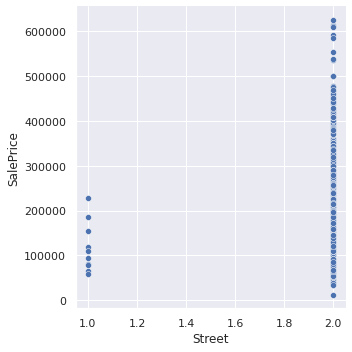

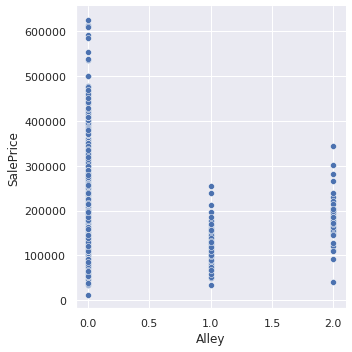

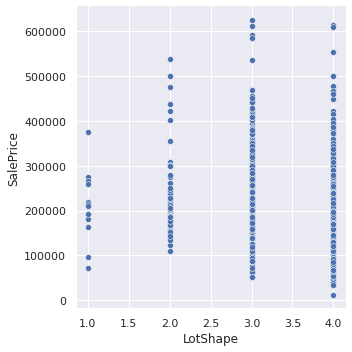

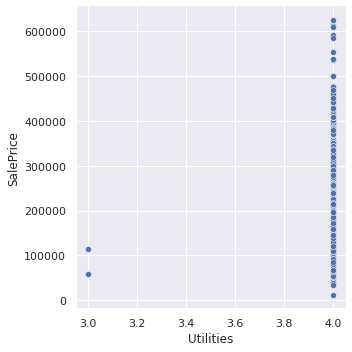

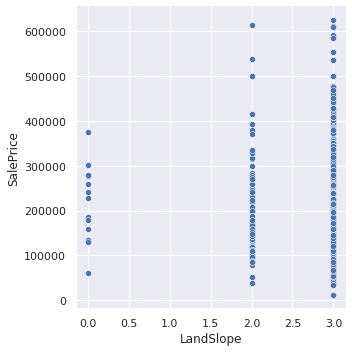

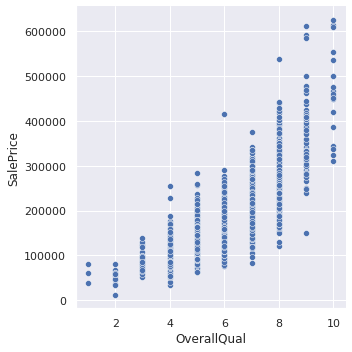

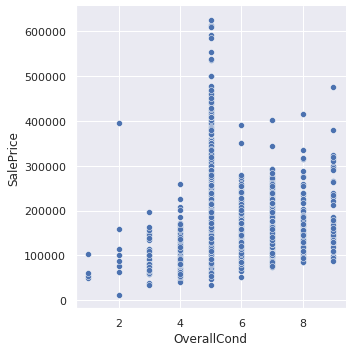

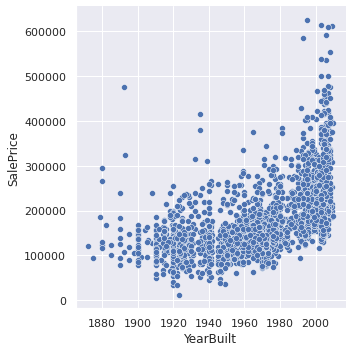

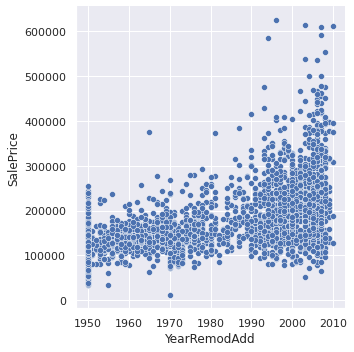

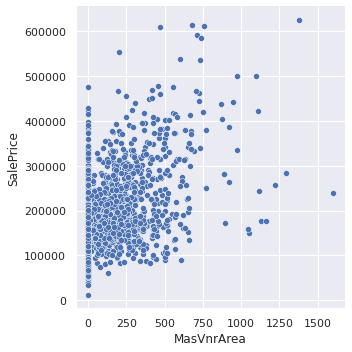

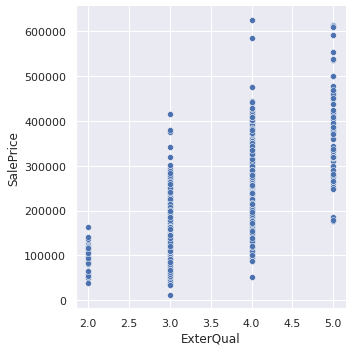

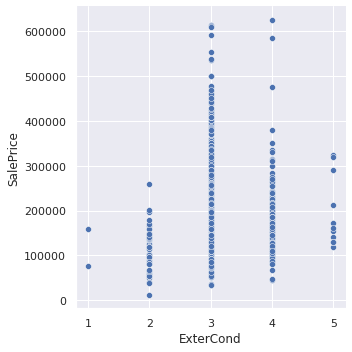

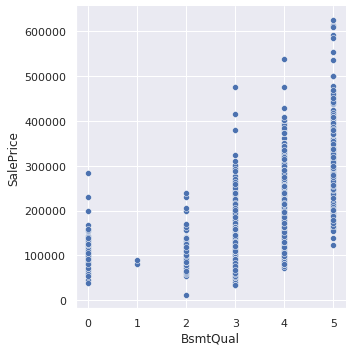

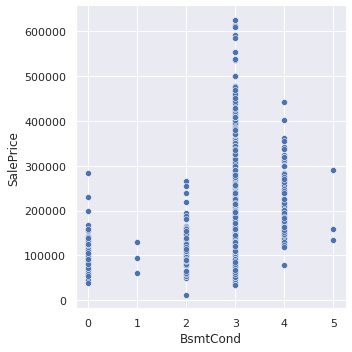

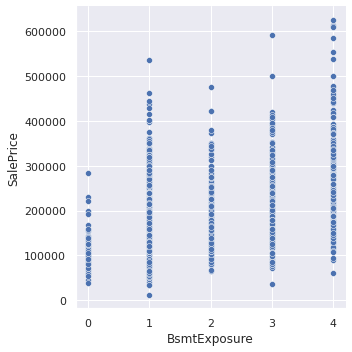

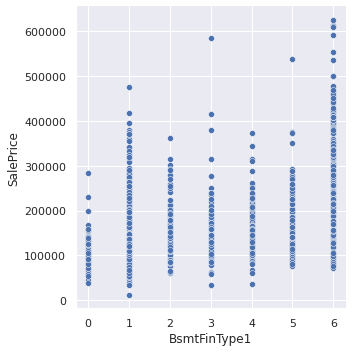

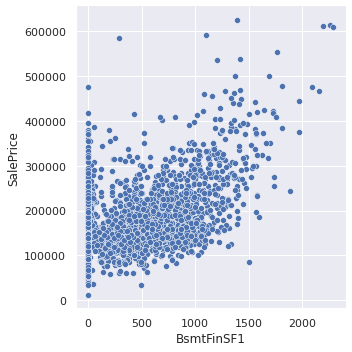

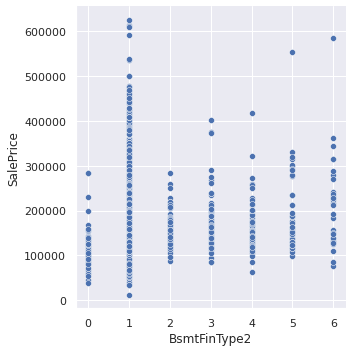

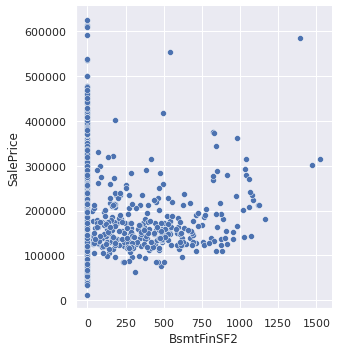

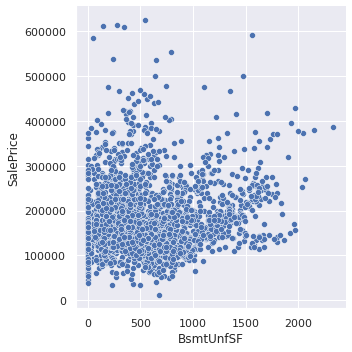

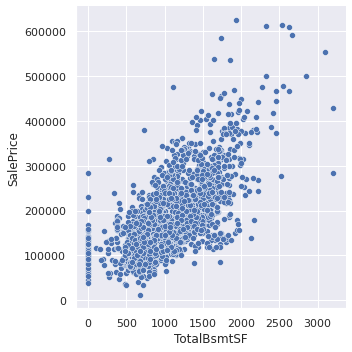

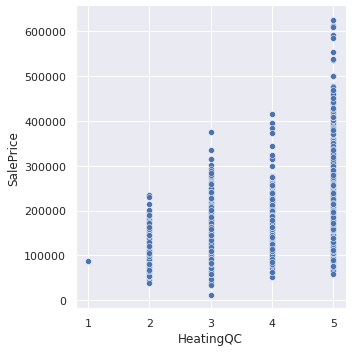

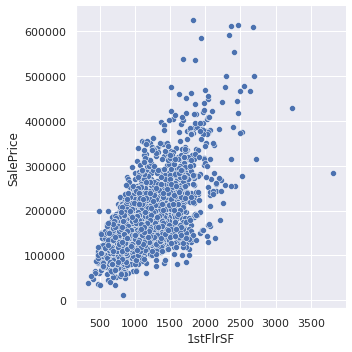

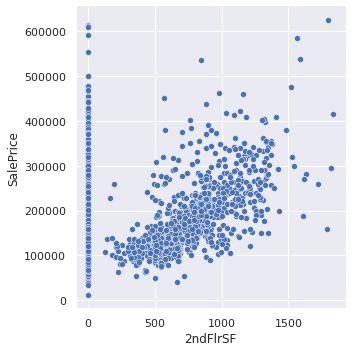

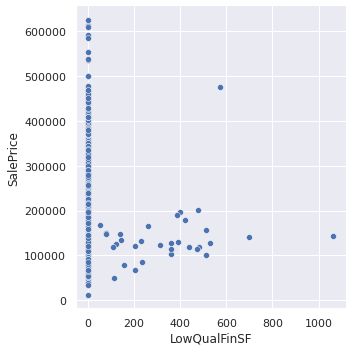

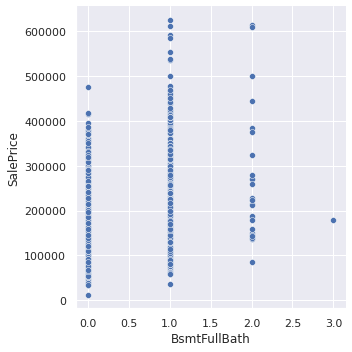

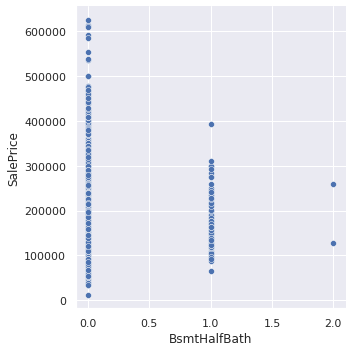

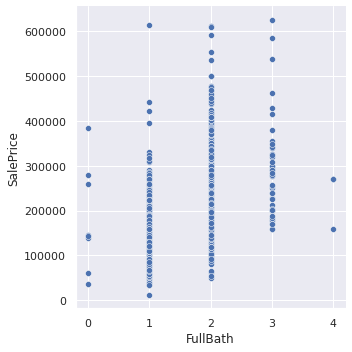

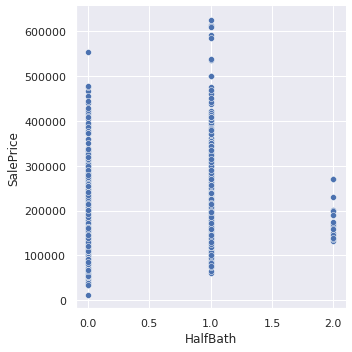

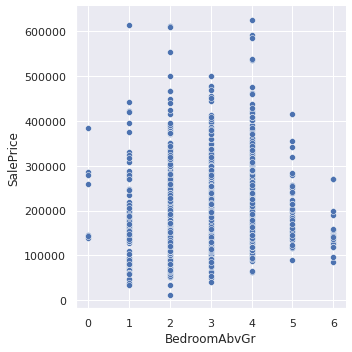

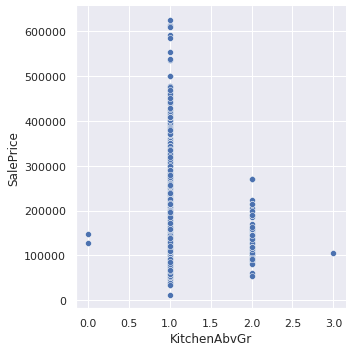

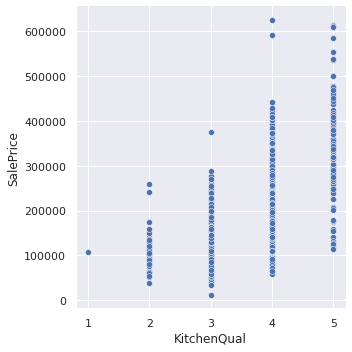

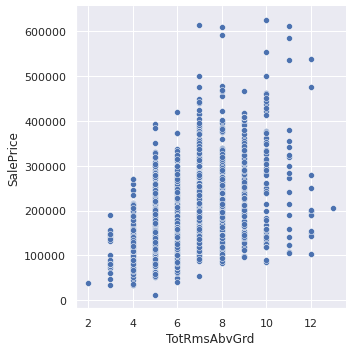

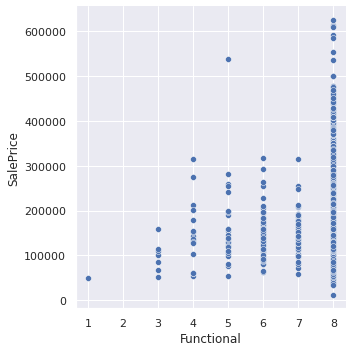

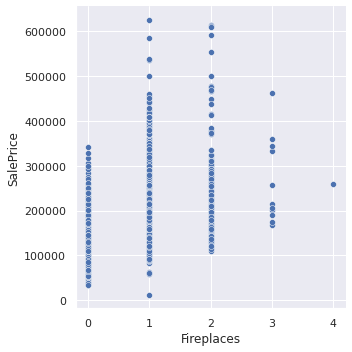

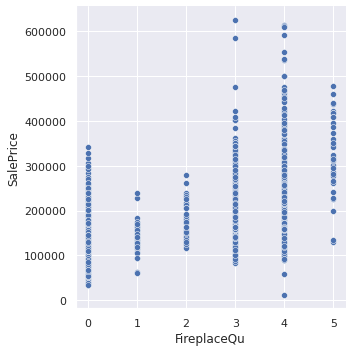

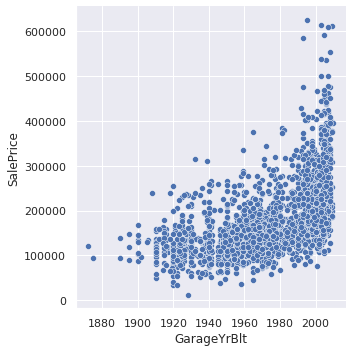

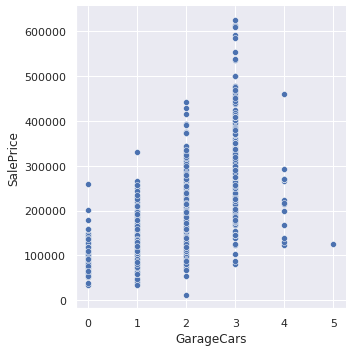

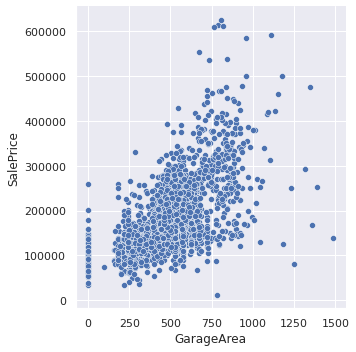

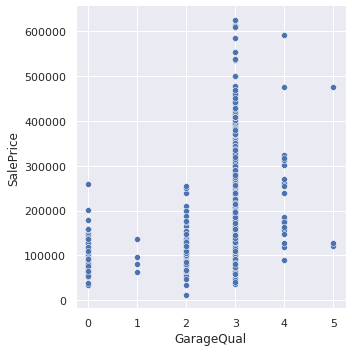

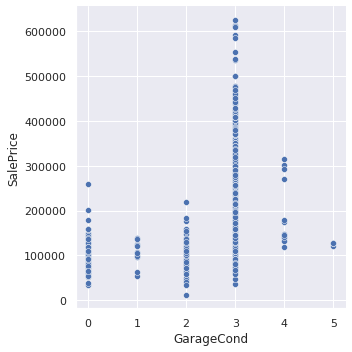

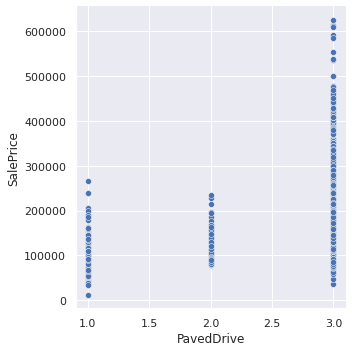

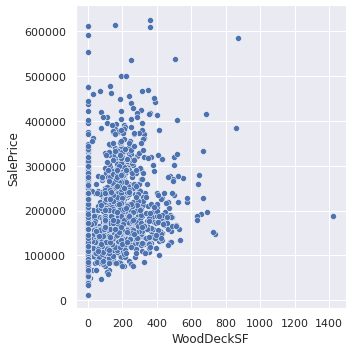

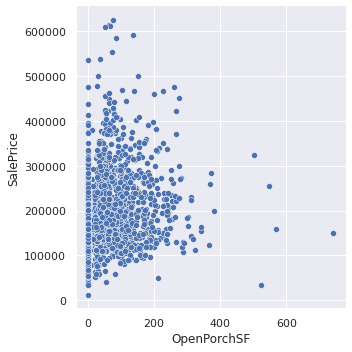

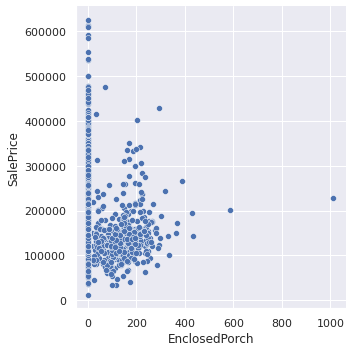

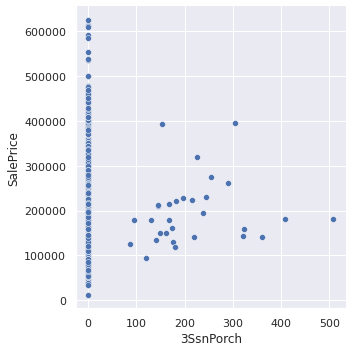

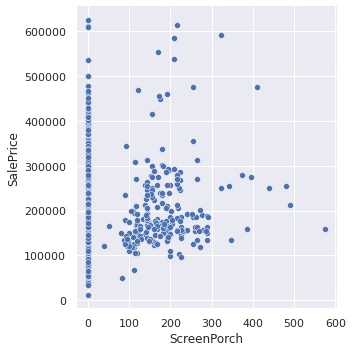

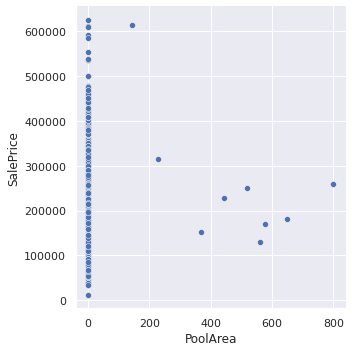

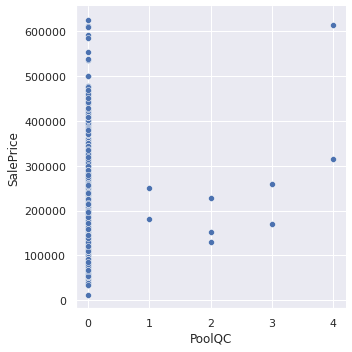

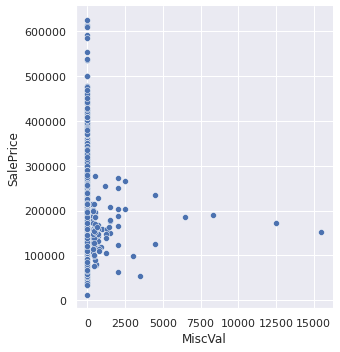

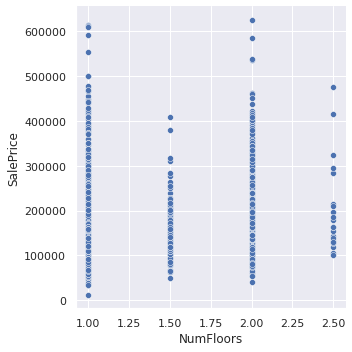

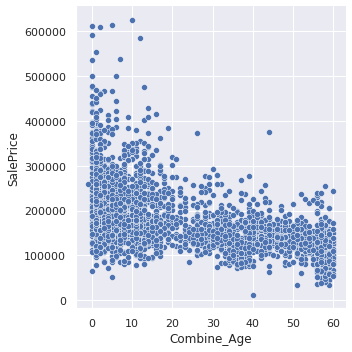

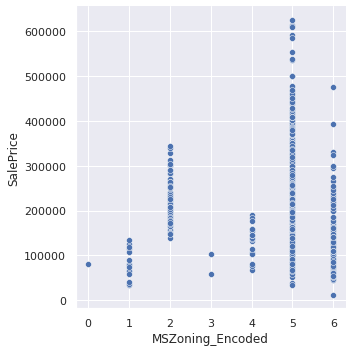

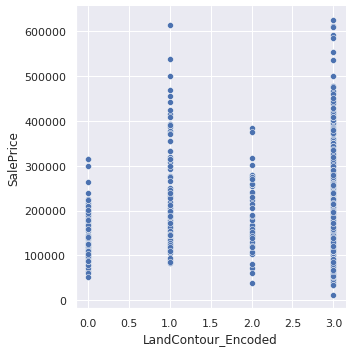

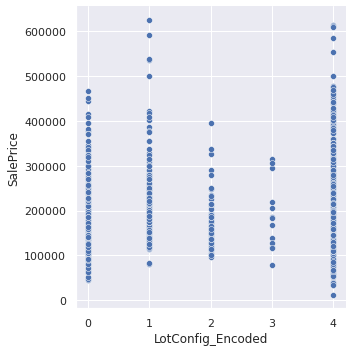

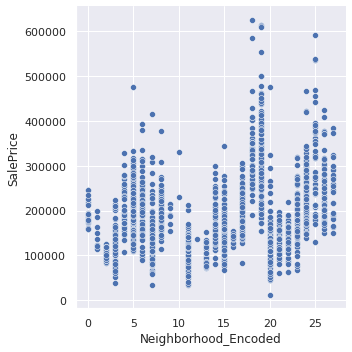

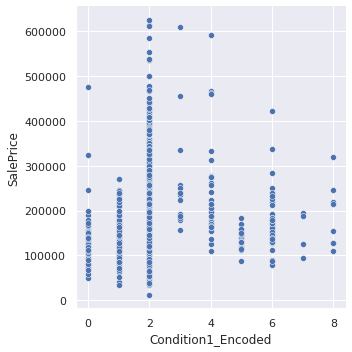

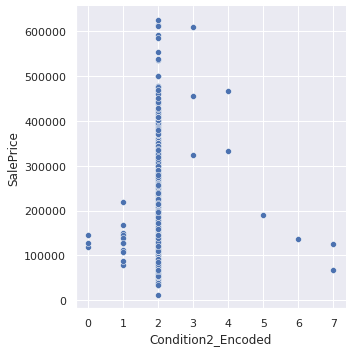

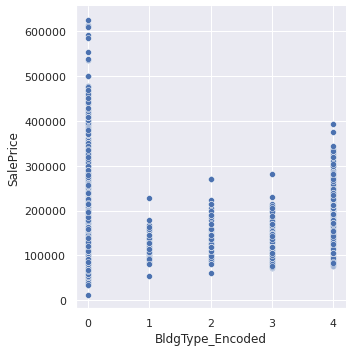

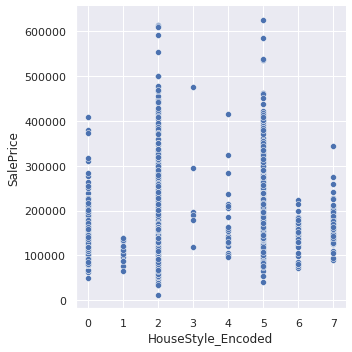

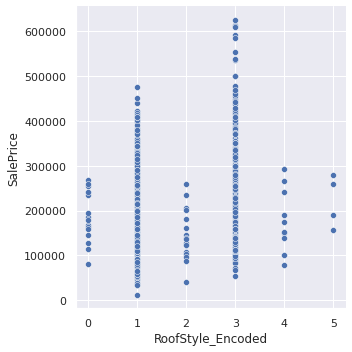

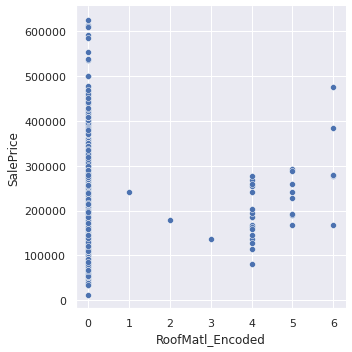

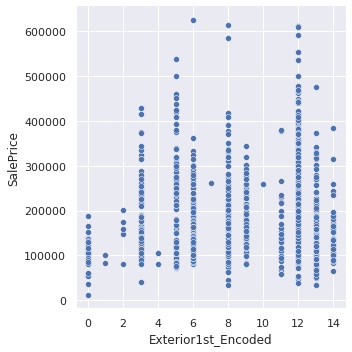

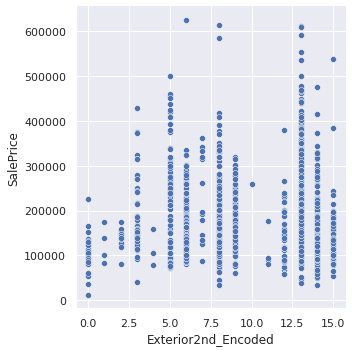

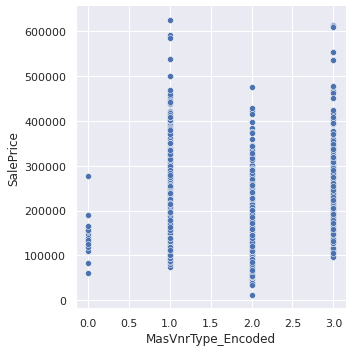

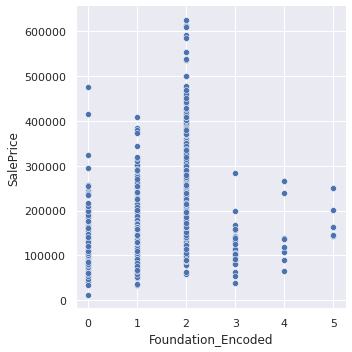

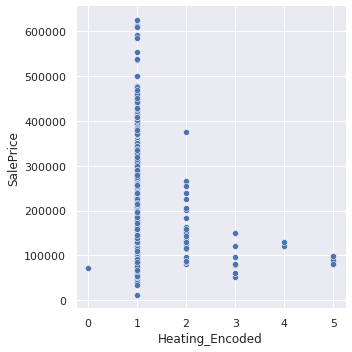

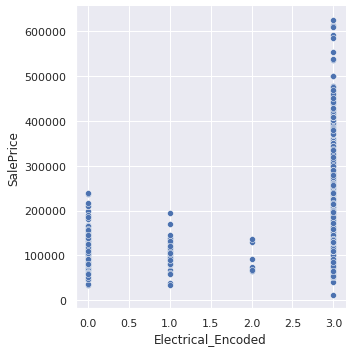

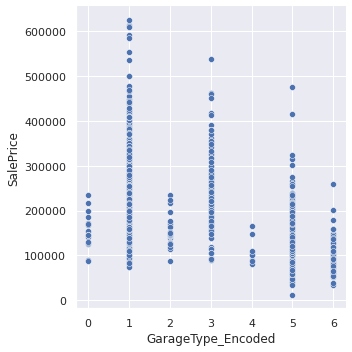

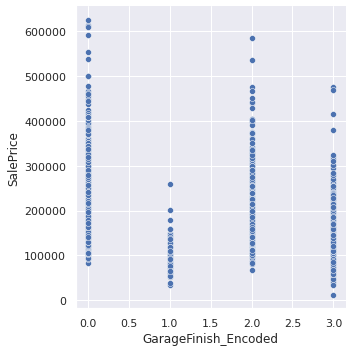

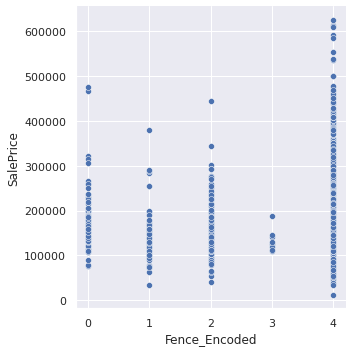

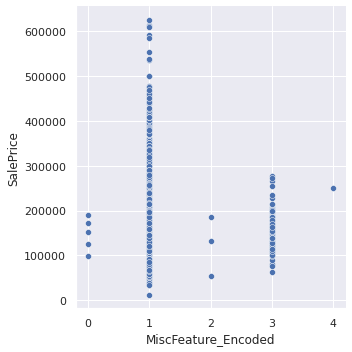

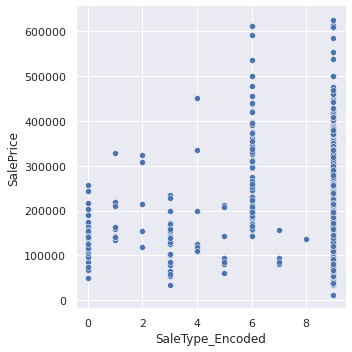

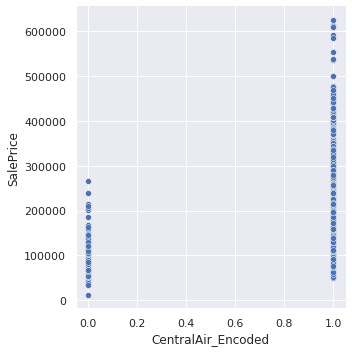

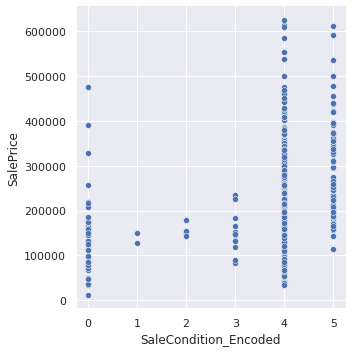

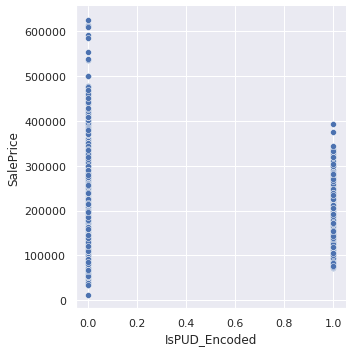

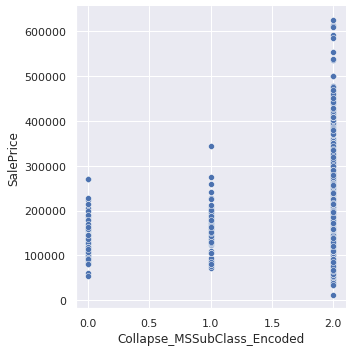

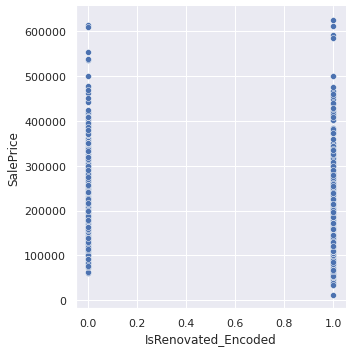

In [48]:
for i in names:

    sns.relplot(x=homes[i], y=prices)
    plt.show()

Add New Features

In [18]:
homes['Age'] = 2010 - homes.YearBuilt
homes['AgeRemod'] = 2010 - homes.YearRemodAdd
homes['AgeGarage'] = 2010 - homes.GarageYrBlt
homes['HasPool'] = (homes.PoolArea > 1).astype(int)
homes['TotalFinBsmtSF'] = homes.BsmtFinSF1 + homes.BsmtFinSF2
homes['TotalOutdoorSF'] = homes.ScreenPorch + homes.WoodDeckSF + homes.OpenPorchSF + homes.EnclosedPorch
homes['logLotArea'] = np.log(homes.LotArea)
homes.head()

GrLivArea  LotFrontage  LotArea  Street  Alley  LotShape  Utilities  \
0        856         66.0     7890       2      0         4          4   
1       1049         42.0     4235       2      0         4          4   
2       1001         60.0     6060       2      0         4          4   
3       1039         80.0     8146       2      0         4          4   
4       1665         70.0     8400       2      0         4          4   

   LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0          3            6            6       1939          1950         0.0   
1          3            5            5       1984          1984       149.0   
2          3            5            9       1930          2007         0.0   
3          3            4            8       1900          2003         0.0   
4          3            8            6       2001          2001         0.0   

   ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3          3         3         3             1             3   
1          4          3         4         3             2             6   
2          4          3         3         3             1             5   
3          4          4         2         3             1             1   
4          4          3         4         3             1             6   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0       238.0             1         0.0      618.0        856.0          3   
1       552.0             5       393.0      104.0       1049.0          3   
2       737.0             1         0.0      100.0        837.0          5   
3         0.0             1         0.0      405.0        405.0          4   
4       643.0             1         0.0      167.0        810.0          5   

   1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  \
0       856         0             0           1.0           0.0         1   
1      1049         0             0           1.0           0.0         2   
2      1001         0             0           0.0           0.0         1   
3       717       322             0           0.0           0.0         1   
4       810       855             0           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0             2             1            3             4   
1         0             2             1            4             5   
2         0             2             1            4             5   
3         0             2             1            3             6   
4         1             3             1            4             6   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  GarageArea  \
0           8           1            4       1939.0         2.0       399.0   
1           8           0            0       1984.0         1.0       266.0   
2           8           0            0       1930.0         1.0       216.0   
3           8           0            0       1940.0         1.0       281.0   
4           8           0            0       2001.0         2.0       528.0   

   GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           3           3           3           0            0              0   
1           3           3           3           0          105              0   
2           3           1           1         154            0             42   
3           3           3           1           0            0            168   
4           3           3           3           0           45              0   

   3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  NumFloors  Combine_Age  \
0          0          166         0       0        0        1.0           60   
1          0            0         0       0        0        1.0           25   
2         86            0         0       0        0        1.0            0 

Visual EDA

In [19]:
names = homes.columns.tolist()

box_plot = ['Alley','LotShape','LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','HeatingQC',
		'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
		'GarageCars','GarageQual','GarageCond','PavedDrive','MSZoning_Encoded','LandContour_Encoded','LotConfig_Encoded','Neighborhood_Encoded','Condition1_Encoded',
		'BldgType_Encoded','HouseStyle_Encoded','RoofStyle_Encoded','RoofMatl_Encoded','Exterior1st_Encoded','Exterior2nd_Encoded','MasVnrType_Encoded','Foundation_Encoded',
		'Heating_Encoded','Electrical_Encoded','GarageType_Encoded','GarageFinish_Encoded','Fence_Encoded','MiscFeature_Encoded','SaleType_Encoded','CentralAir_Encoded',
		'SaleCondition_Encoded','IsPUD_Encoded','Collapse_MSSubClass_Encoded','IsRenovated_Encoded','HasPool']

drop_col = ['Street','Utilities','BsmtFinType2','BsmtUnfSF','LowQualFinSF','3SsnPorch','PoolQC','MiscVal','NumFloors','Combine_Age','Condition2_Encoded']

log_plot = ['logLotArea']

scatter_plot = set(names) - set(box_plot) - set(log_plot) - set(drop_col)

- Categorical Features

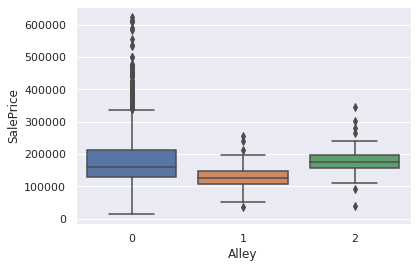

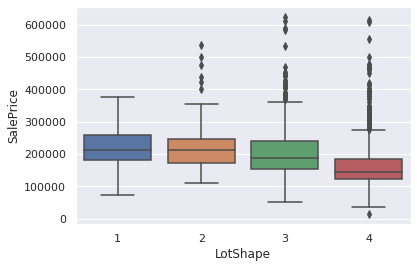

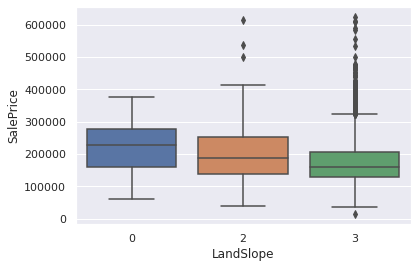

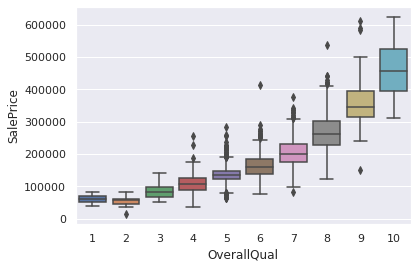

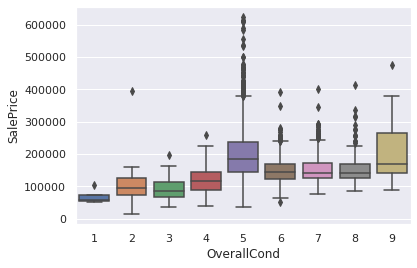

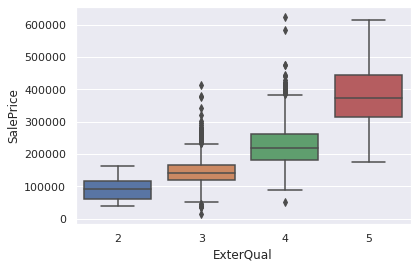

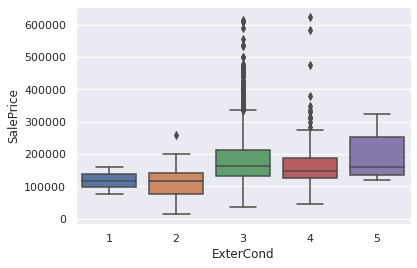

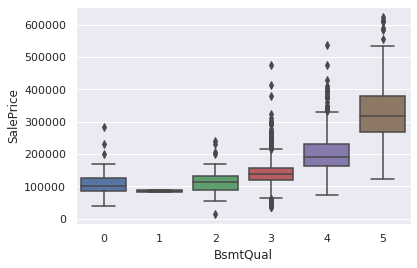

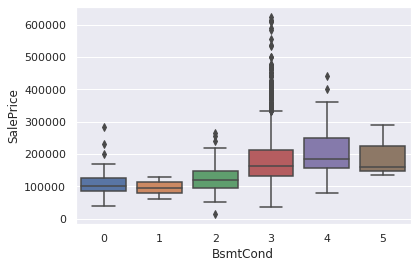

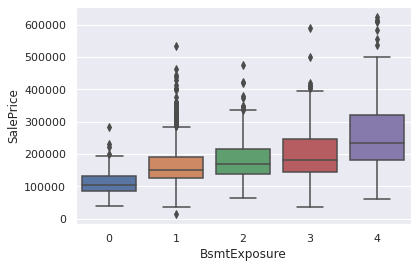

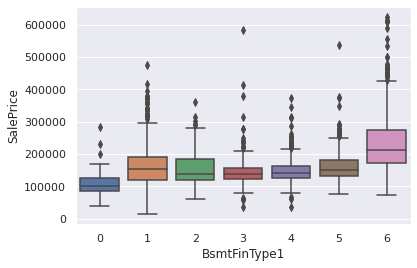

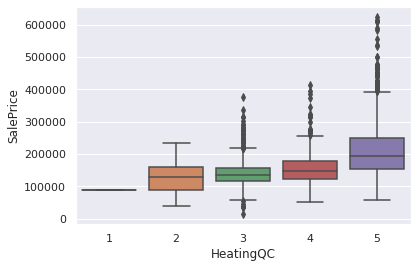

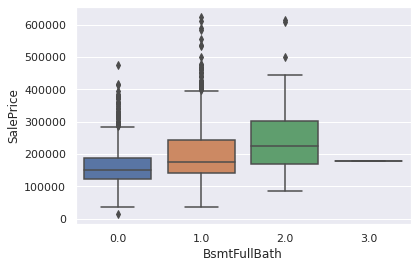

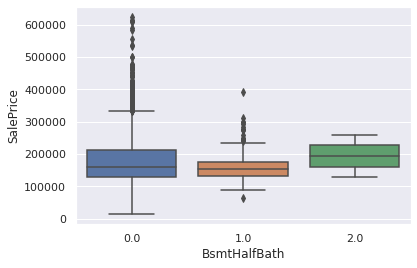

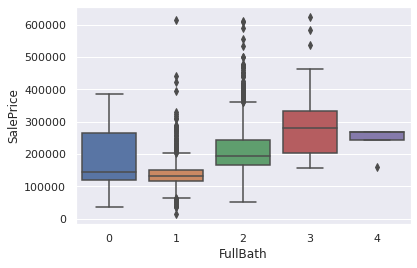

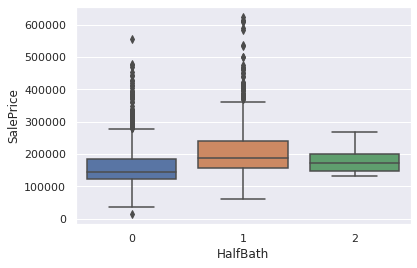

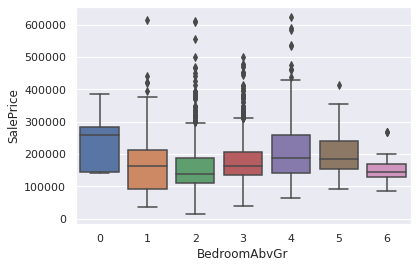

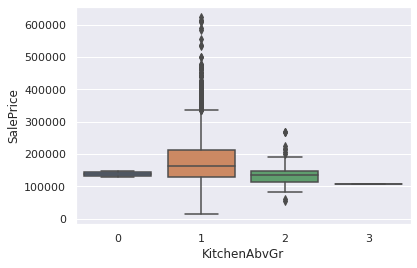

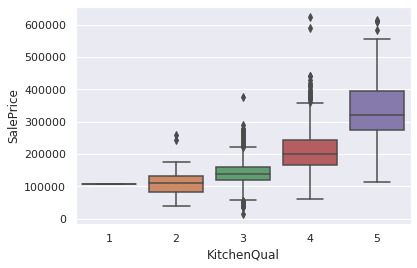

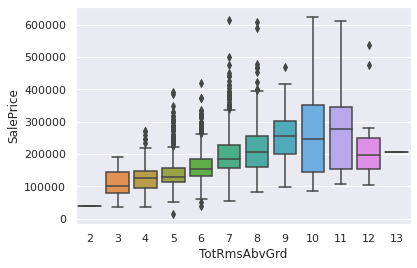

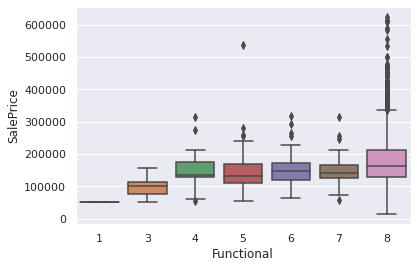

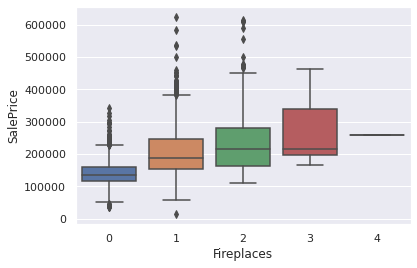

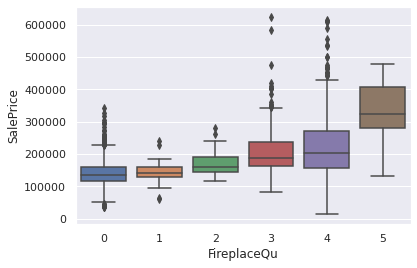

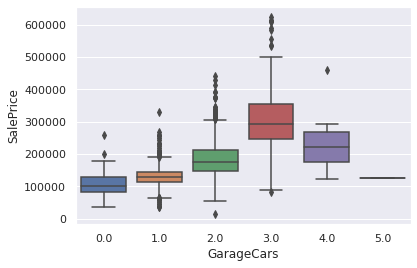

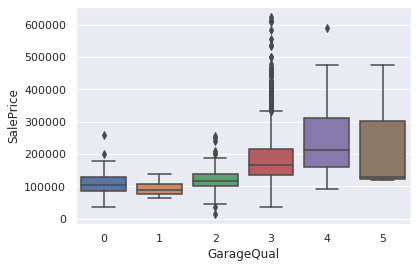

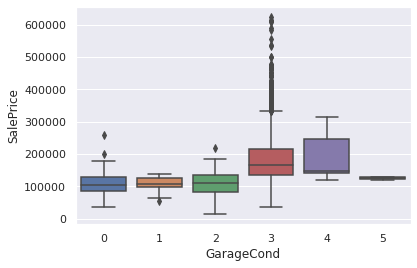

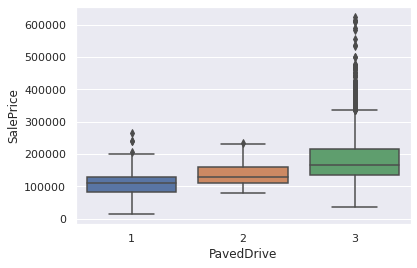

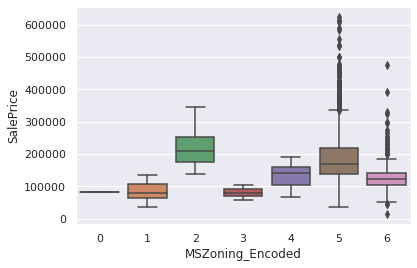

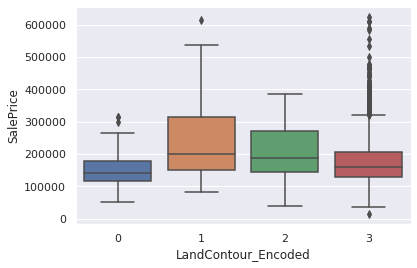

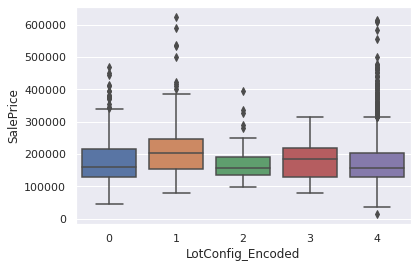

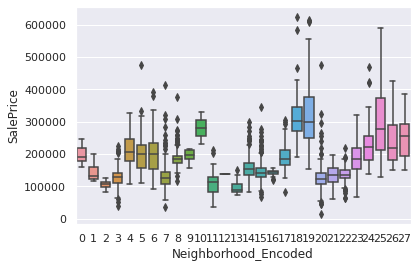

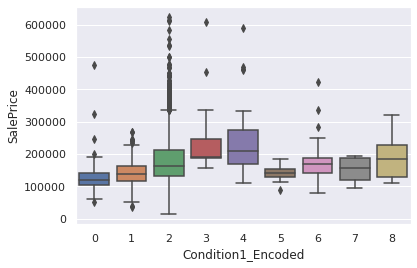

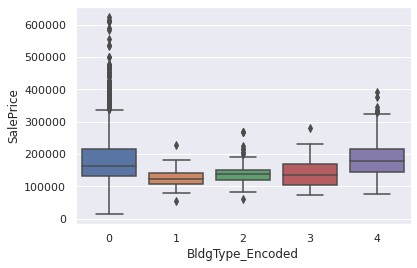

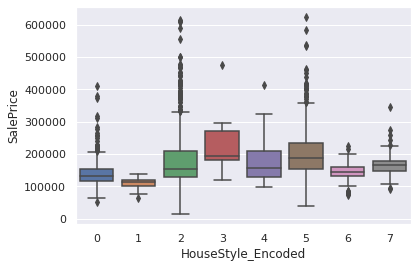

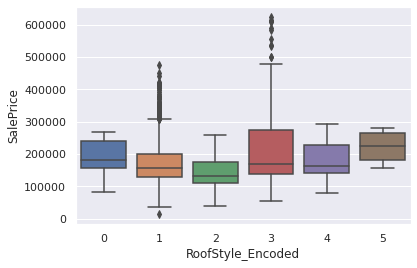

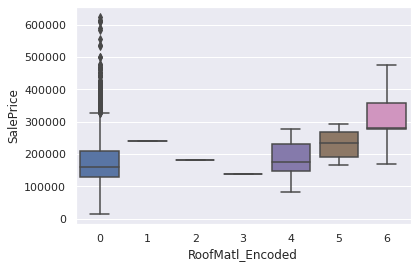

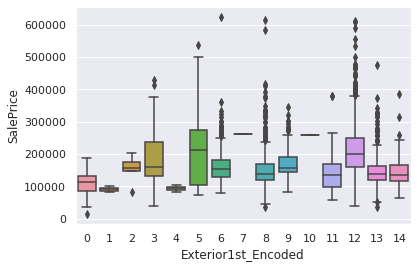

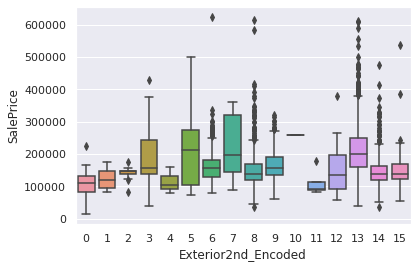

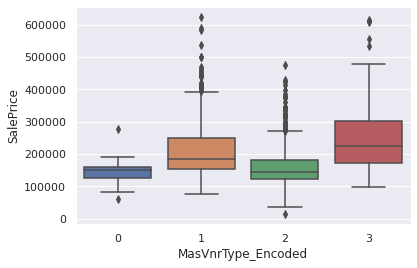

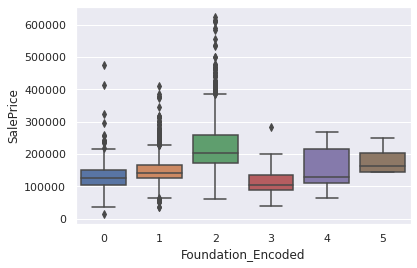

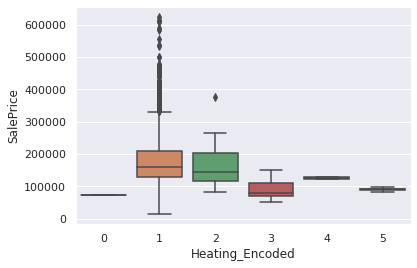

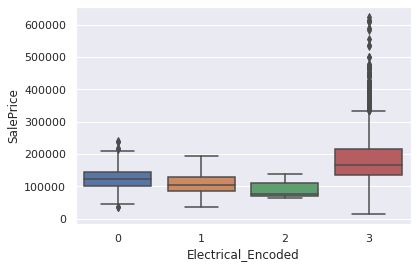

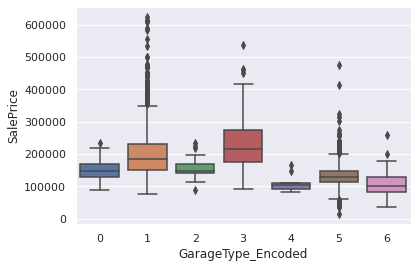

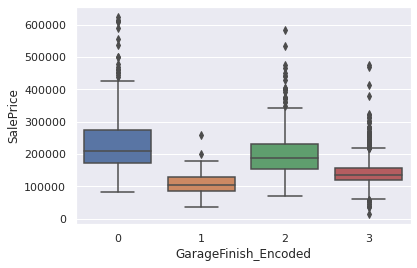

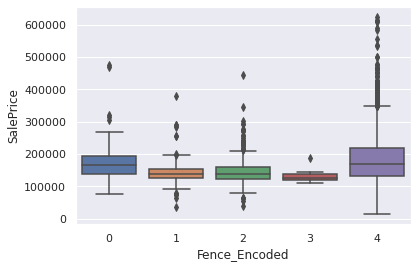

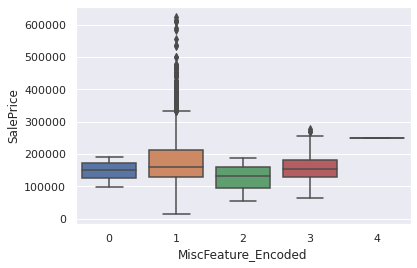

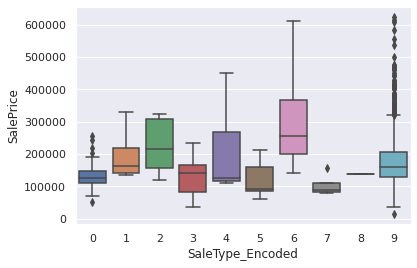

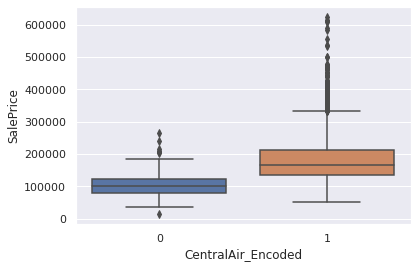

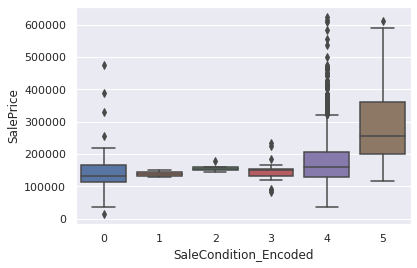

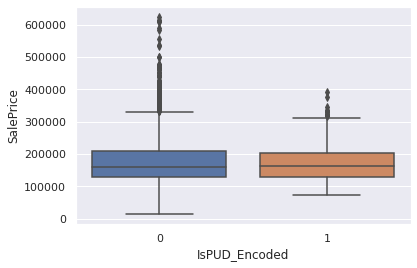

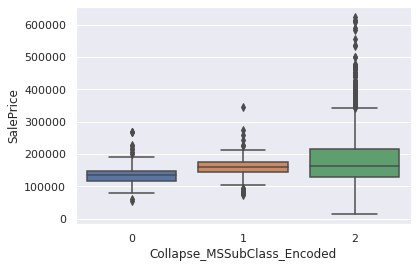

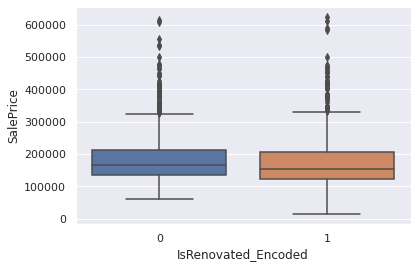

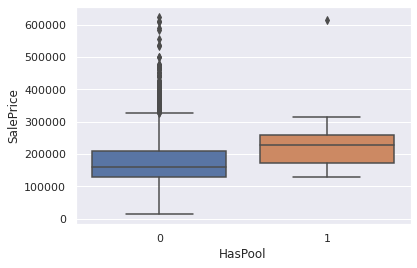

In [11]:
for i in box_plot:
    sns.boxplot(x=homes[i],y=prices)
    plt.show()

In [13]:

box_keep_all = ['LandSlope','BsmtExposure','BsmtFullBath','BsmtHalfBath','Fireplaces','BsmtFinType1','HeatingQC','FullBath','HalfBath',
		'Functional','TotRmsAbvGrd','GarageCars','PavedDrive','BldgType_Encoded','CentralAir_Encoded','HasPool','Collapse_MSSubClass_Encoded']

box_keep_1 = ['OverallQual','OverallCond']

box_keep_2 = ['ExterQual','ExterCond','BsmtQual','BsmtCond','KitchenQual','FireplaceQu','GarageQual','GarageCond']


In [20]:
#convert nominal catergorical to binary where seems appropriate

homes['OverallCond'] = (homes['OverallCond'] > 4).astype(int)
homes['ExterCond'] = (homes['ExterCond'] > 2).astype(int)
homes['BsmtCond'] = (homes['BsmtCond'] > 2).astype(int)
homes['BsmtFinType1'] = (homes['BsmtFinType1'] > 5).astype(int)
homes['HeatingQC'] = (homes['HeatingQC'] > 4).astype(int)
homes['Functional'] = (homes['Functional'] > 7).astype(int)
homes['GarageQual'] = (homes['GarageQual'] > 2).astype(int)
homes['GarageCond'] = (homes['GarageCond'] > 2).astype(int)
homes['BsmtHalfBath'] = (homes['BsmtHalfBath'] > 0).astype(int)
homes['HalfBath'] = (homes['HalfBath'] > 0).astype(int)
homes['BldgType_Encoded'] = (homes['BldgType_Encoded'] < 1).astype(int)

In [21]:
#collapse some subgroups where seems appropriate
homes['FullBath'].loc[homes['FullBath'] < 1] = 1
homes['FullBath'].loc[homes['FullBath'] > 3] = 3
homes['BsmtFullBath'].loc[homes['BsmtFullBath'] > 2] = 2
homes['TotRmsAbvGrd'].loc[homes['TotRmsAbvGrd'] > 9] = 9
homes['GarageCars'].loc[homes['GarageCars'] > 3] = 3
homes['PavedDrive'].loc[homes['PavedDrive'] > 2] = 2

/tmp/ipykernel_13139/2496066797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes['FullBath'].loc[homes['FullBath'] < 1] = 1
/tmp/ipykernel_13139/2496066797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes['FullBath'].loc[homes['FullBath'] > 3] = 3
/tmp/ipykernel_13139/2496066797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes['BsmtFullBath'].loc[homes['BsmtFullBath'] > 2] = 2
/tmp/ipykernel_13139/2496066797.

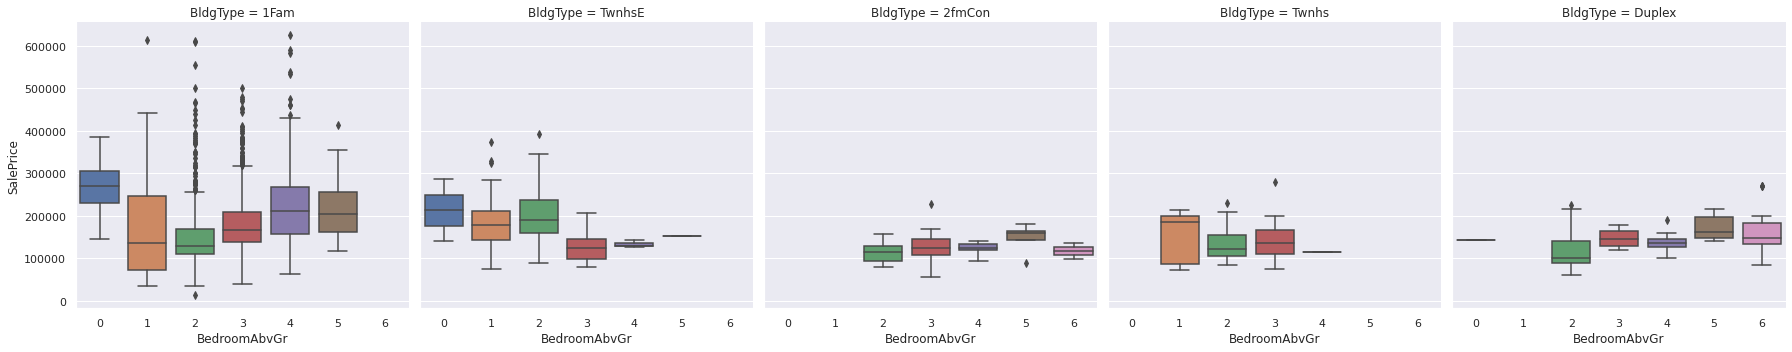

In [92]:
#justify droppng columns
sns.catplot(data=homes_raw,x='BedroomAbvGr',y='SalePrice',col='BldgType',kind='box')

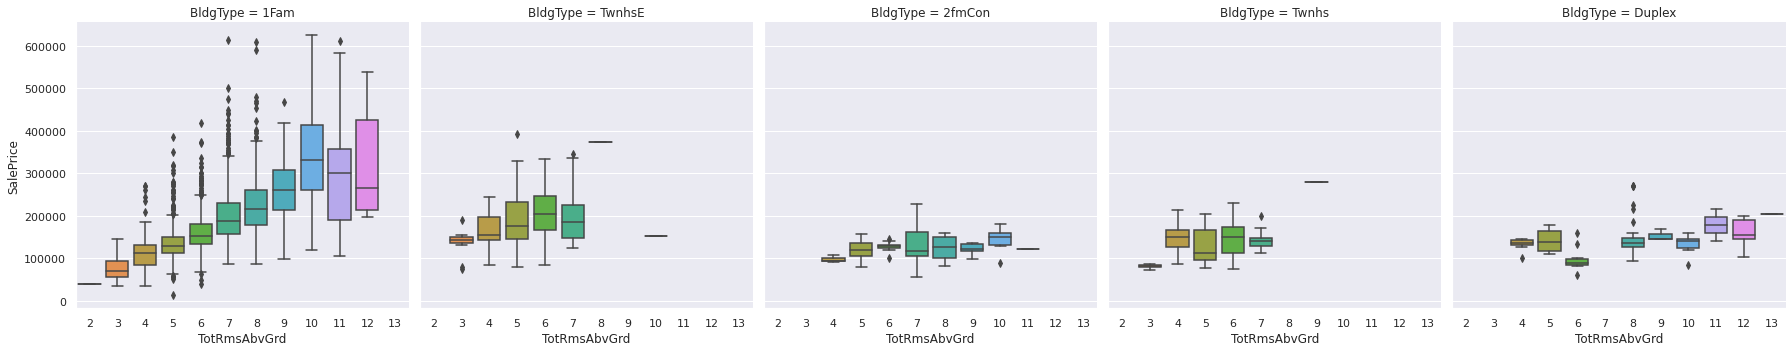

In [5]:
sns.catplot(data=homes_raw,x='TotRmsAbvGrd',y='SalePrice',col='BldgType',kind='box')

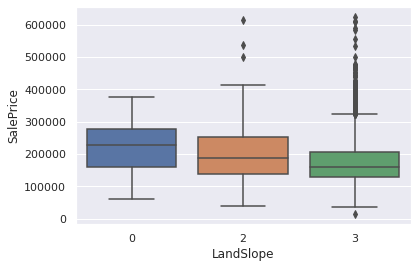

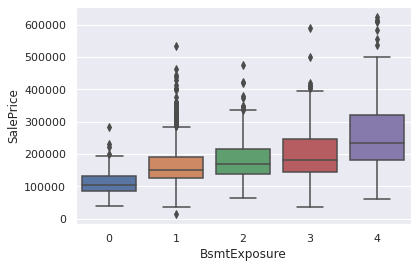

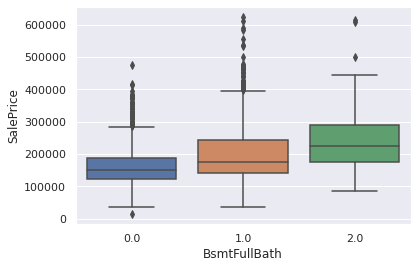

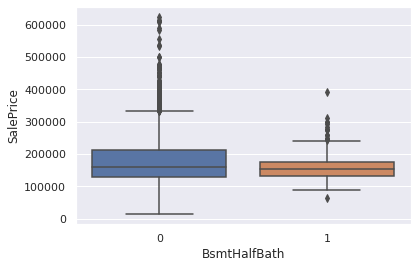

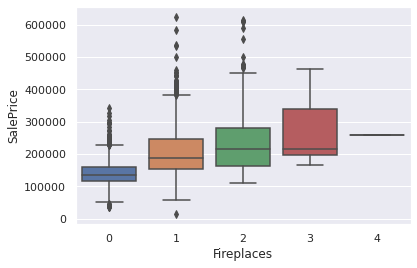

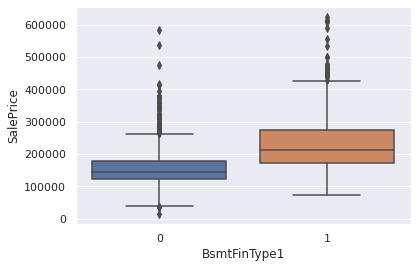

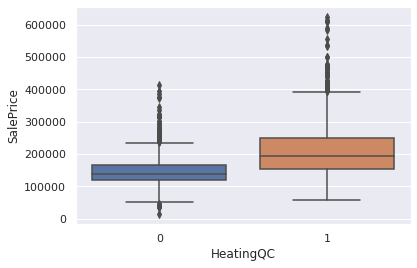

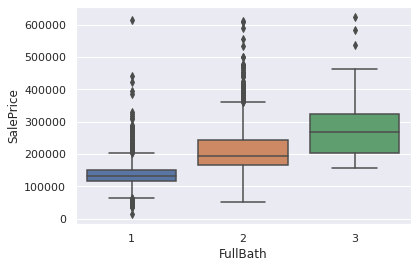

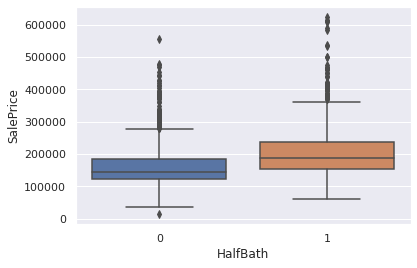

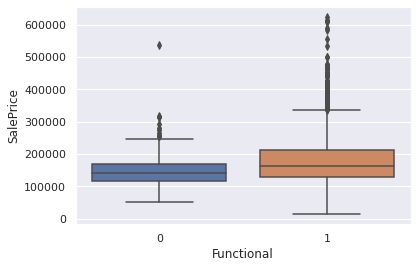

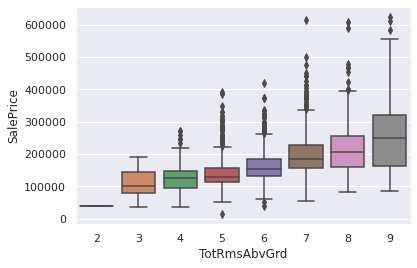

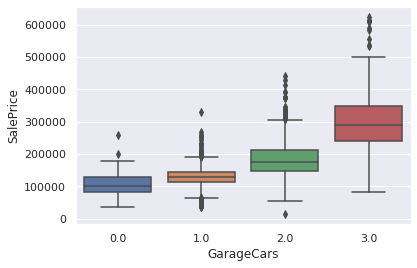

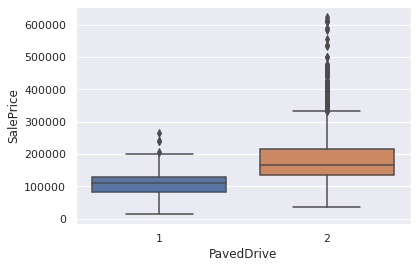

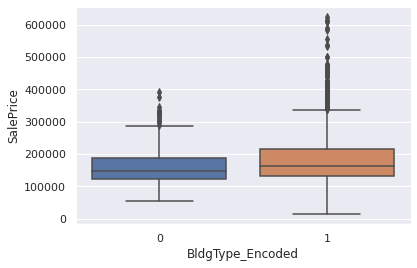

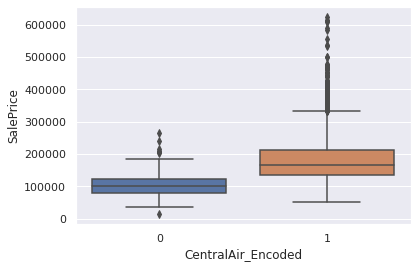

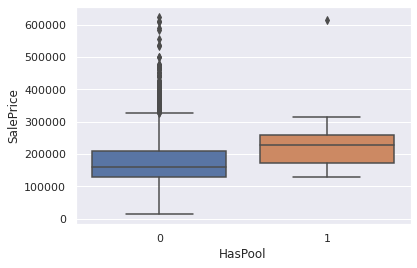

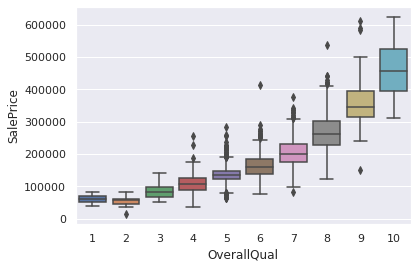

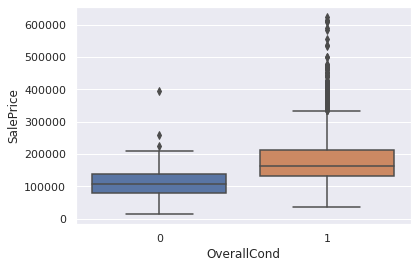

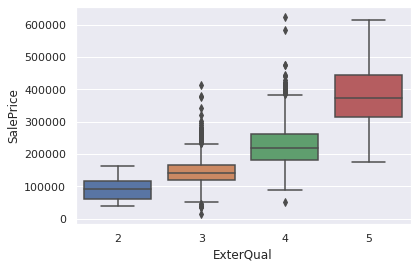

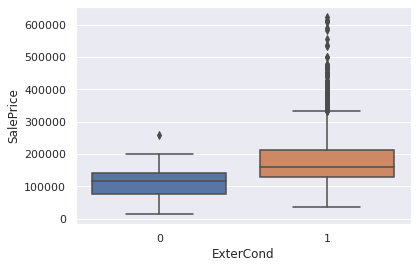

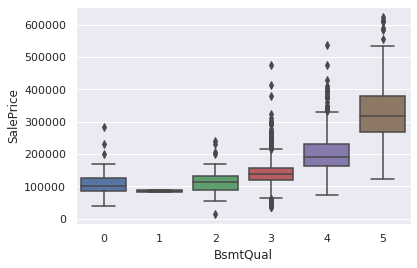

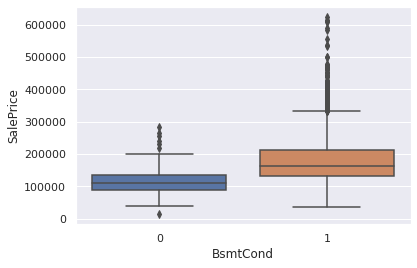

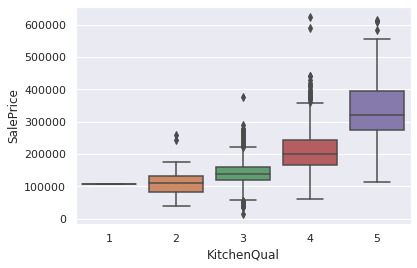

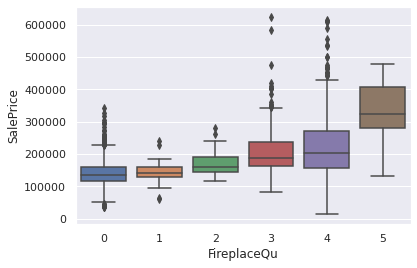

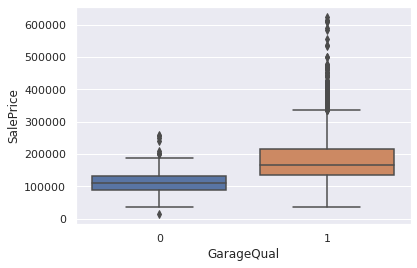

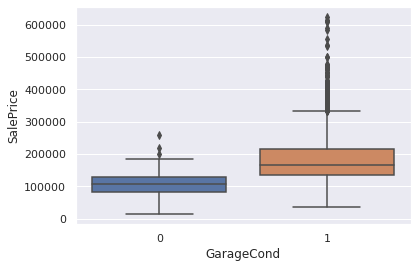

In [17]:
#review new plots to verify transformations

for i in box_keep_all + box_keep_1 + box_keep_2:
    sns.boxplot(x=homes[i],y=prices)
    plt.show()

- Continuous Variables

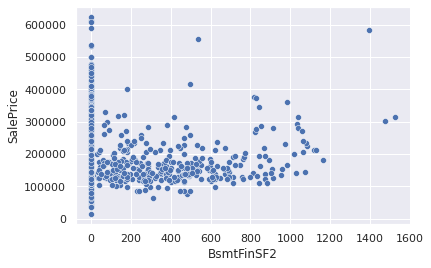

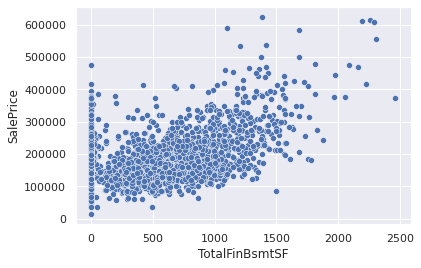

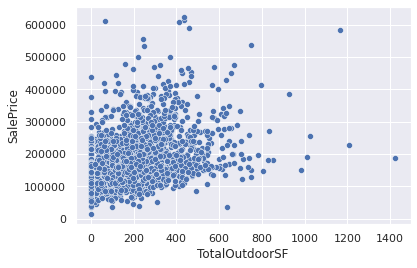

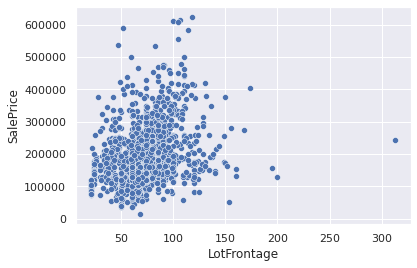

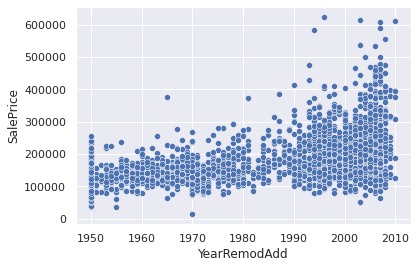

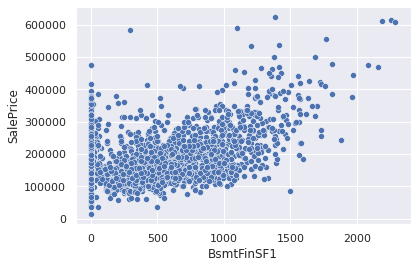

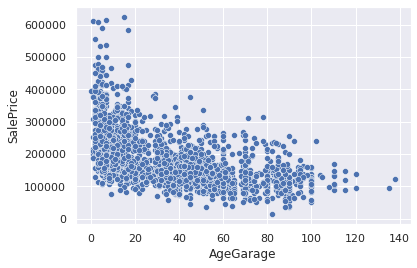

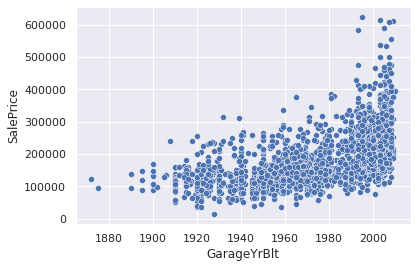

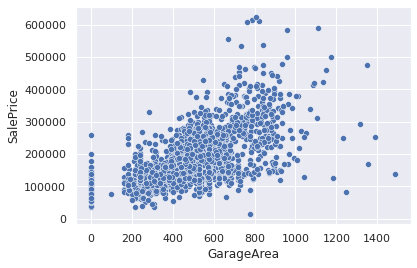

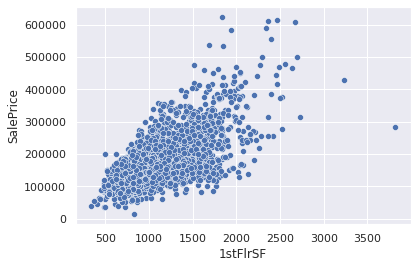

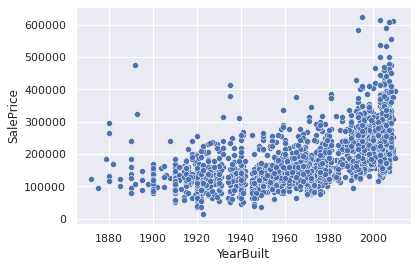

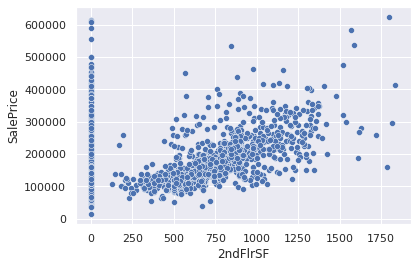

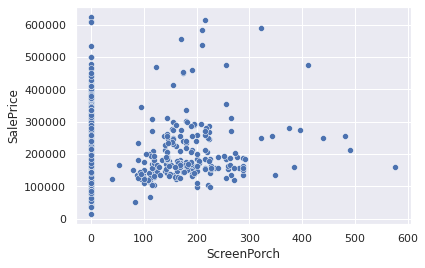

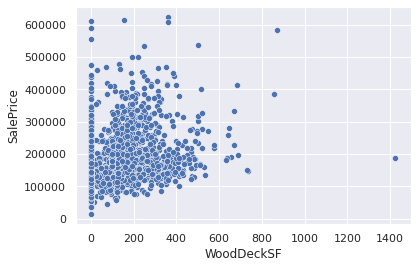

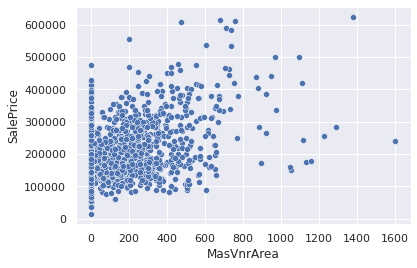

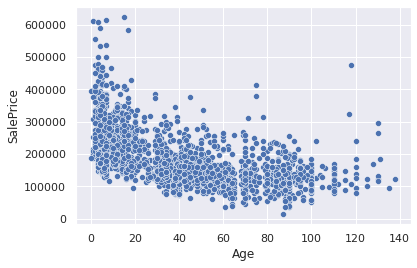

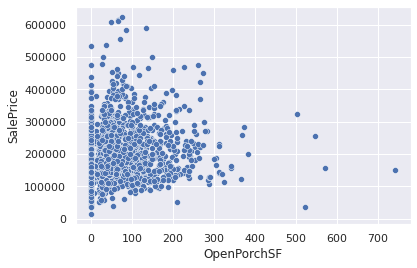

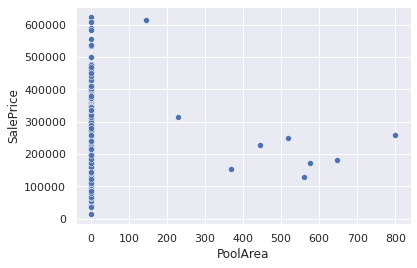

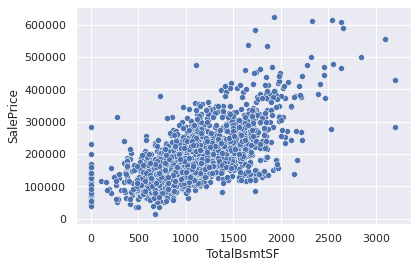

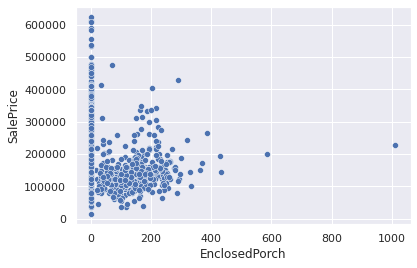

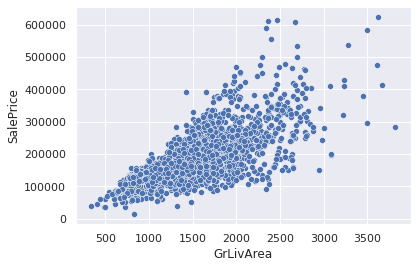

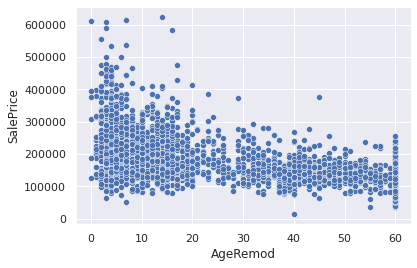

In [233]:
for i in scatter_plot:
    sns.scatterplot(x=homes[i],y=prices)
    plt.show()

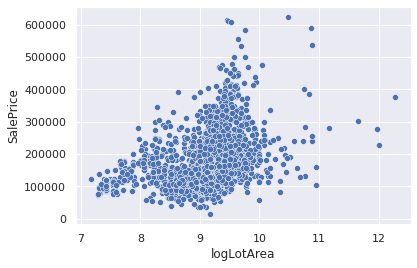

In [240]:
for i in log_plot:
    sns.scatterplot(x=homes[i],y=prices)
    plt.show()

In [15]:
scatter_keep_all = ['LotFrontage','GarageArea','MasVnrArea','Age']

scatter_keep_1 = ['TotalOutdoorSF','TotalBsmtSF','GrLivArea']

scatter_keep_2 = ['BsmtFinSF1','1stFlrSF','2ndFlrSF','ScreenPorch','WoodDeckSF','OpenPorchSF','EnclosedPorch']

log_keep_all = ['logLotArea']

#### Feature Selection


In [16]:
features = box_keep_all + box_keep_2 + scatter_keep_all + scatter_keep_2 + log_keep_all #use more detailed features (individual qualities, SF, etc)

features_broad = box_keep_all + box_keep_1 + scatter_keep_all + scatter_keep_1 + log_keep_all  #use broad features (overall categories, SF)

In [32]:
dropped_features = set(homes.columns) - set(features)
dropped_features_broad = set(homes.columns) - set(features_broad)
dropped_features


{'3SsnPorch',
 'AgeGarage',
 'AgeRemod',
 'Alley',
 'BedroomAbvGr',
 'BsmtFinSF2',
 'BsmtFinType2',
 'BsmtUnfSF',
 'Collapse_MSSubClass_Encoded',
 'Combine_Age',
 'Condition1_Encoded',
 'Condition2_Encoded',
 'Electrical_Encoded',
 'Exterior1st_Encoded',
 'Exterior2nd_Encoded',
 'Fence_Encoded',
 'Foundation_Encoded',
 'GarageFinish_Encoded',
 'GarageType_Encoded',
 'GarageYrBlt',
 'GrLivArea',
 'Heating_Encoded',
 'HouseStyle_Encoded',
 'IsPUD_Encoded',
 'IsRenovated_Encoded',
 'KitchenAbvGr',
 'LandContour_Encoded',
 'LotArea',
 'LotConfig_Encoded',
 'LotShape',
 'LowQualFinSF',
 'MSZoning_Encoded',
 'MasVnrType_Encoded',
 'MiscFeature_Encoded',
 'MiscVal',
 'Neighborhood_Encoded',
 'NumFloors',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'PoolQC',
 'RoofMatl_Encoded',
 'RoofStyle_Encoded',
 'SaleCondition_Encoded',
 'SaleType_Encoded',
 'Street',
 'TotalBsmtSF',
 'TotalFinBsmtSF',
 'TotalOutdoorSF',
 'Utilities',
 'YearBuilt',
 'YearRemodAdd'}

# Modeling Features

Model Without Normalizing Continuous Variables

In [41]:
homes_features = homes[features]
homes_features.head()

LandSlope  BsmtExposure  BsmtFullBath  BsmtHalfBath  Fireplaces  \
0          3             1           1.0             0           1   
1          3             2           1.0             0           0   
2          3             1           0.0             0           0   
3          3             1           0.0             0           0   
4          3             1           1.0             0           0   

   BsmtFinType1  HeatingQC  FullBath  HalfBath  Functional  TotRmsAbvGrd  \
0             0          0         1         0           1             4   
1             1          0         2         0           1             5   
2             0          1         1         0           1             5   
3             0          0         1         0           1             6   
4             1          1         2         1           1             6   

   GarageCars  PavedDrive  BldgType_Encoded  CentralAir_Encoded  HasPool  \
0         2.0           2                 1                   1        0   
1         1.0           2                 0                   1        0   
2         1.0           1                 1                   1        0   
3         1.0           1                 1                   1        0   
4         2.0           2                 1                   1        0   

   Collapse_MSSubClass_Encoded  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0                            2          3          1         3         1   
1                            2          4          1         4         1   
2                            2          4          1         3         1   
3                            2          4          1         2         1   
4                            2          4          1         4         1   

   KitchenQual  FireplaceQu  GarageQual  GarageCond  LotFrontage  GarageArea  \
0            3            4           1           1         66.0       399.0   
1            4            0           1           1         42.0       266.0   
2            4            0           1           0         60.0       216.0   
3            3            0           1           1         80.0       281.0   
4            4            0           1           1         70.0       528.0   

   MasVnrArea  Age  BsmtFinSF1  1stFlrSF  2ndFlrSF  ScreenPorch  WoodDeckSF  \
0         0.0   71       238.0       856         0          166           0   
1       149.0   26       552.0      1049         0            0           0   
2         0.0   80       737.0      1001         0            0         154   
3         0.0  110         0.0       717       322          111           0   
4         0.0    9       643.0       810       855            0           0   

   OpenPorchSF  EnclosedPorch  logLotArea  
0            0              0    8.973351  
1          105              0    8.351139  
2            0             42    8.709465  
3            0            168    9.005282  
4           45              0    9.035987

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(homes_features, prices, random_state=0, test_size=0.3)

In [43]:
forest = RandomForestRegressor()
forest.set_params(random_state=0)

get_score(forest)

Train Accuracy:  0.9812440594777467
Test Accuracy:  0.8848631061368382


In [44]:
forest_params = pd.DataFrame(forest.feature_importances_, index=homes_features.columns).reset_index().sort_values(by=0,ascending=False)
forest_params.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
forest_params

Feature     Score
17                    ExterQual  0.330574
26                   GarageArea  0.152318
11                   GarageCars  0.110001
30                     1stFlrSF  0.095597
31                     2ndFlrSF  0.044739
22                  FireplaceQu  0.030889
28                          Age  0.030349
29                   BsmtFinSF1  0.028015
36                   logLotArea  0.026644
7                      FullBath  0.020699
27                   MasVnrArea  0.016851
19                     BsmtQual  0.015324
21                  KitchenQual  0.015269
34                  OpenPorchSF  0.011981
4                    Fireplaces  0.009509
25                  LotFrontage  0.009314
33                   WoodDeckSF  0.008201
10                 TotRmsAbvGrd  0.007510
1                  BsmtExposure  0.005409
8                      HalfBath  0.005375
32                  ScreenPorch  0.004486
14           CentralAir_Encoded  0.003357
35                EnclosedPorch  0.002567
2                  BsmtFullBath  0.002443
6                     HeatingQC  0.001666
13             BldgType_Encoded  0.001566
20                     BsmtCond  0.001481
0                     LandSlope  0.001444
24                   GarageCond  0.001427
5                  BsmtFinType1  0.001328
18                    ExterCond  0.000783
12                   PavedDrive  0.000672
9                    Functional  0.000623
23                   GarageQual  0.000535
16  Collapse_MSSubClass_Encoded  0.000501
3                  BsmtHalfBath  0.000482
15                      HasPool  0.000075

In [270]:
grid_para_forest = [{
    'n_estimators' : range(100,300,50),
    'criterion' : ['squared_error'],  
    'max_depth' : [10,15,20,25,30],
    'min_samples_split' : range(2,10,2),
    'min_samples_leaf' : [2,5,10],
    'max_features' : range(10,30,5)
}]

grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)

get_score(grid_search_forest)

Train Accuracy:  0.9662989469836595
Test Accuracy:  0.8877802572323034


In [27]:
grid_para_forest = [{
    'n_estimators' : range(150,200,250),
    'criterion' : ['squared_error'],  
    'max_depth' : [22,23,24,25,26],
    'min_samples_split' : range(2,10,2),
    'min_samples_leaf' : [2],
    'max_features' : range(14,18)
}]

grid_search_forest = GridSearchCV(forest, grid_para_forest, scoring='r2', cv=5, n_jobs=-1)

get_score(grid_search_forest)

Train Accuracy:  0.9714870472415978
Test Accuracy:  0.888529751612948


In [28]:
grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=25, max_features=14, min_samples_leaf=2,
                      n_estimators=150, random_state=0)

Model with Normalizing
- [is there a better way? https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff]

In [45]:
for i in homes_features.columns:
    if homes_features[i].mean() > 9:
        homes_features[i] = (homes_features[i] - min(homes_features[i]))/(max(homes_features[i])-min(homes_features[i]))

/tmp/ipykernel_13139/629219935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes_features[i] = (homes_features[i] - min(homes_features[i]))/(max(homes_features[i])-min(homes_features[i]))


In [46]:
homes_features.head()

LandSlope  BsmtExposure  BsmtFullBath  BsmtHalfBath  Fireplaces  \
0          3             1           1.0             0           1   
1          3             2           1.0             0           0   
2          3             1           0.0             0           0   
3          3             1           0.0             0           0   
4          3             1           1.0             0           0   

   BsmtFinType1  HeatingQC  FullBath  HalfBath  Functional  TotRmsAbvGrd  \
0             0          0         1         0           1             4   
1             1          0         2         0           1             5   
2             0          1         1         0           1             5   
3             0          0         1         0           1             6   
4             1          1         2         1           1             6   

   GarageCars  PavedDrive  BldgType_Encoded  CentralAir_Encoded  HasPool  \
0         2.0           2                 1                   1        0   
1         1.0           2                 0                   1        0   
2         1.0           1                 1                   1        0   
3         1.0           1                 1                   1        0   
4         2.0           2                 1                   1        0   

   Collapse_MSSubClass_Encoded  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0                            2          3          1         3         1   
1                            2          4          1         4         1   
2                            2          4          1         3         1   
3                            2          4          1         2         1   
4                            2          4          1         4         1   

   KitchenQual  FireplaceQu  GarageQual  GarageCond  LotFrontage  GarageArea  \
0            3            4           1           1     0.154110    0.268145   
1            4            0           1           1     0.071918    0.178763   
2            4            0           1           0     0.133562    0.145161   
3            3            0           1           1     0.202055    0.188844   
4            4            0           1           1     0.167808    0.354839   

   MasVnrArea       Age  BsmtFinSF1  1stFlrSF  2ndFlrSF  ScreenPorch  \
0    0.000000  0.514493    0.104021  0.149742  0.000000     0.288194   
1    0.093125  0.188406    0.241259  0.205106  0.000000     0.000000   
2    0.000000  0.579710    0.322115  0.191337  0.000000     0.000000   
3    0.000000  0.797101    0.000000  0.109868  0.175381     0.192708   
4    0.000000  0.065217    0.281031  0.136546  0.465686     0.000000   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  logLotArea  
0    0.000000     0.000000       0.000000    0.352924  
1    0.000000     0.141509       0.000000    0.231146  
2    0.108146     0.000000       0.041502    0.301276  
3    0.000000     0.000000       0.166008    0.359173  
4    0.000000     0.060647       0.000000    0.365182

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(homes_features, prices, random_state=0, test_size=0.3)

In [48]:
forest = RandomForestRegressor()
forest.set_params(random_state=0)

get_score(forest)

Train Accuracy:  0.9812581258096841
Test Accuracy:  0.8849850886019912


In [49]:
forest_params = pd.DataFrame(forest.feature_importances_, index=homes_features.columns).reset_index().sort_values(by=0,ascending=False)
forest_params.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
forest_params

Feature     Score
17                    ExterQual  0.330574
26                   GarageArea  0.152318
11                   GarageCars  0.110001
30                     1stFlrSF  0.095597
31                     2ndFlrSF  0.044739
22                  FireplaceQu  0.030889
28                          Age  0.030349
29                   BsmtFinSF1  0.028015
36                   logLotArea  0.026644
7                      FullBath  0.020699
27                   MasVnrArea  0.016851
19                     BsmtQual  0.015324
21                  KitchenQual  0.015269
34                  OpenPorchSF  0.011981
4                    Fireplaces  0.009509
25                  LotFrontage  0.009314
33                   WoodDeckSF  0.008201
10                 TotRmsAbvGrd  0.007510
1                  BsmtExposure  0.005409
8                      HalfBath  0.005375
32                  ScreenPorch  0.004486
14           CentralAir_Encoded  0.003357
35                EnclosedPorch  0.002567
2                  BsmtFullBath  0.002443
6                     HeatingQC  0.001666
13             BldgType_Encoded  0.001566
20                     BsmtCond  0.001481
0                     LandSlope  0.001444
24                   GarageCond  0.001427
5                  BsmtFinType1  0.001328
18                    ExterCond  0.000783
12                   PavedDrive  0.000672
9                    Functional  0.000623
23                   GarageQual  0.000535
16  Collapse_MSSubClass_Encoded  0.000501
3                  BsmtHalfBath  0.000482
15                      HasPool  0.000075

# Modeling Features_Broad

In [50]:
homes_features_broad = homes[features_broad]
homes_features_broad.head()

LandSlope  BsmtExposure  BsmtFullBath  BsmtHalfBath  Fireplaces  \
0          3             1           1.0             0           1   
1          3             2           1.0             0           0   
2          3             1           0.0             0           0   
3          3             1           0.0             0           0   
4          3             1           1.0             0           0   

   BsmtFinType1  HeatingQC  FullBath  HalfBath  Functional  TotRmsAbvGrd  \
0             0          0         1         0           1             4   
1             1          0         2         0           1             5   
2             0          1         1         0           1             5   
3             0          0         1         0           1             6   
4             1          1         2         1           1             6   

   GarageCars  PavedDrive  BldgType_Encoded  CentralAir_Encoded  HasPool  \
0         2.0           2                 1                   1        0   
1         1.0           2                 0                   1        0   
2         1.0           1                 1                   1        0   
3         1.0           1                 1                   1        0   
4         2.0           2                 1                   1        0   

   Collapse_MSSubClass_Encoded  OverallQual  OverallCond  LotFrontage  \
0                            2            6            1         66.0   
1                            2            5            1         42.0   
2                            2            5            1         60.0   
3                            2            4            1         80.0   
4                            2            8            1         70.0   

   GarageArea  MasVnrArea  Age  TotalOutdoorSF  TotalBsmtSF  GrLivArea  \
0       399.0         0.0   71             166        856.0        856   
1       266.0       149.0   26             105       1049.0       1049   
2       216.0         0.0   80             196        837.0       1001   
3       281.0         0.0  110             279        405.0       1039   
4       528.0         0.0    9              45        810.0       1665   

   logLotArea  
0    8.973351  
1    8.351139  
2    8.709465  
3    9.005282  
4    9.035987

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(homes_features_broad, prices, random_state=0, test_size=0.3)

In [53]:
forest = RandomForestRegressor()
forest.set_params(random_state=0)

get_score(forest)

Train Accuracy:  0.9846129975446419
Test Accuracy:  0.9003186077881686


In [54]:
forest = pd.DataFrame(forest.feature_importances_, index=homes_features_broad.columns).reset_index().sort_values(by=0,ascending=False)
forest.rename({'index':'Feature',0:'Score'},inplace=True, axis=1)
forest

Feature     Score
17                  OverallQual  0.547392
25                    GrLivArea  0.150932
24                  TotalBsmtSF  0.098714
20                   GarageArea  0.049940
22                          Age  0.025895
26                   logLotArea  0.025453
21                   MasVnrArea  0.018828
23               TotalOutdoorSF  0.012339
11                   GarageCars  0.011706
7                      FullBath  0.010235
19                  LotFrontage  0.008393
1                  BsmtExposure  0.006958
2                  BsmtFullBath  0.006354
4                    Fireplaces  0.005009
18                  OverallCond  0.004376
5                  BsmtFinType1  0.003298
10                 TotRmsAbvGrd  0.003018
6                     HeatingQC  0.002631
8                      HalfBath  0.001992
14           CentralAir_Encoded  0.001456
13             BldgType_Encoded  0.001205
0                     LandSlope  0.001136
9                    Functional  0.000954
16  Collapse_MSSubClass_Encoded  0.000716
3                  BsmtHalfBath  0.000604
12                   PavedDrive  0.000420
15                      HasPool  0.000042